In [1]:
from tools import *
from scraper import *
from data import *
from model import *
from events import *
import pandas as pd
import time
import matplotlib.pyplot as plt


import numpy as np
import datetime as dt

In [2]:
llh = LinkLoadHandler()
taps = tapsHandler()

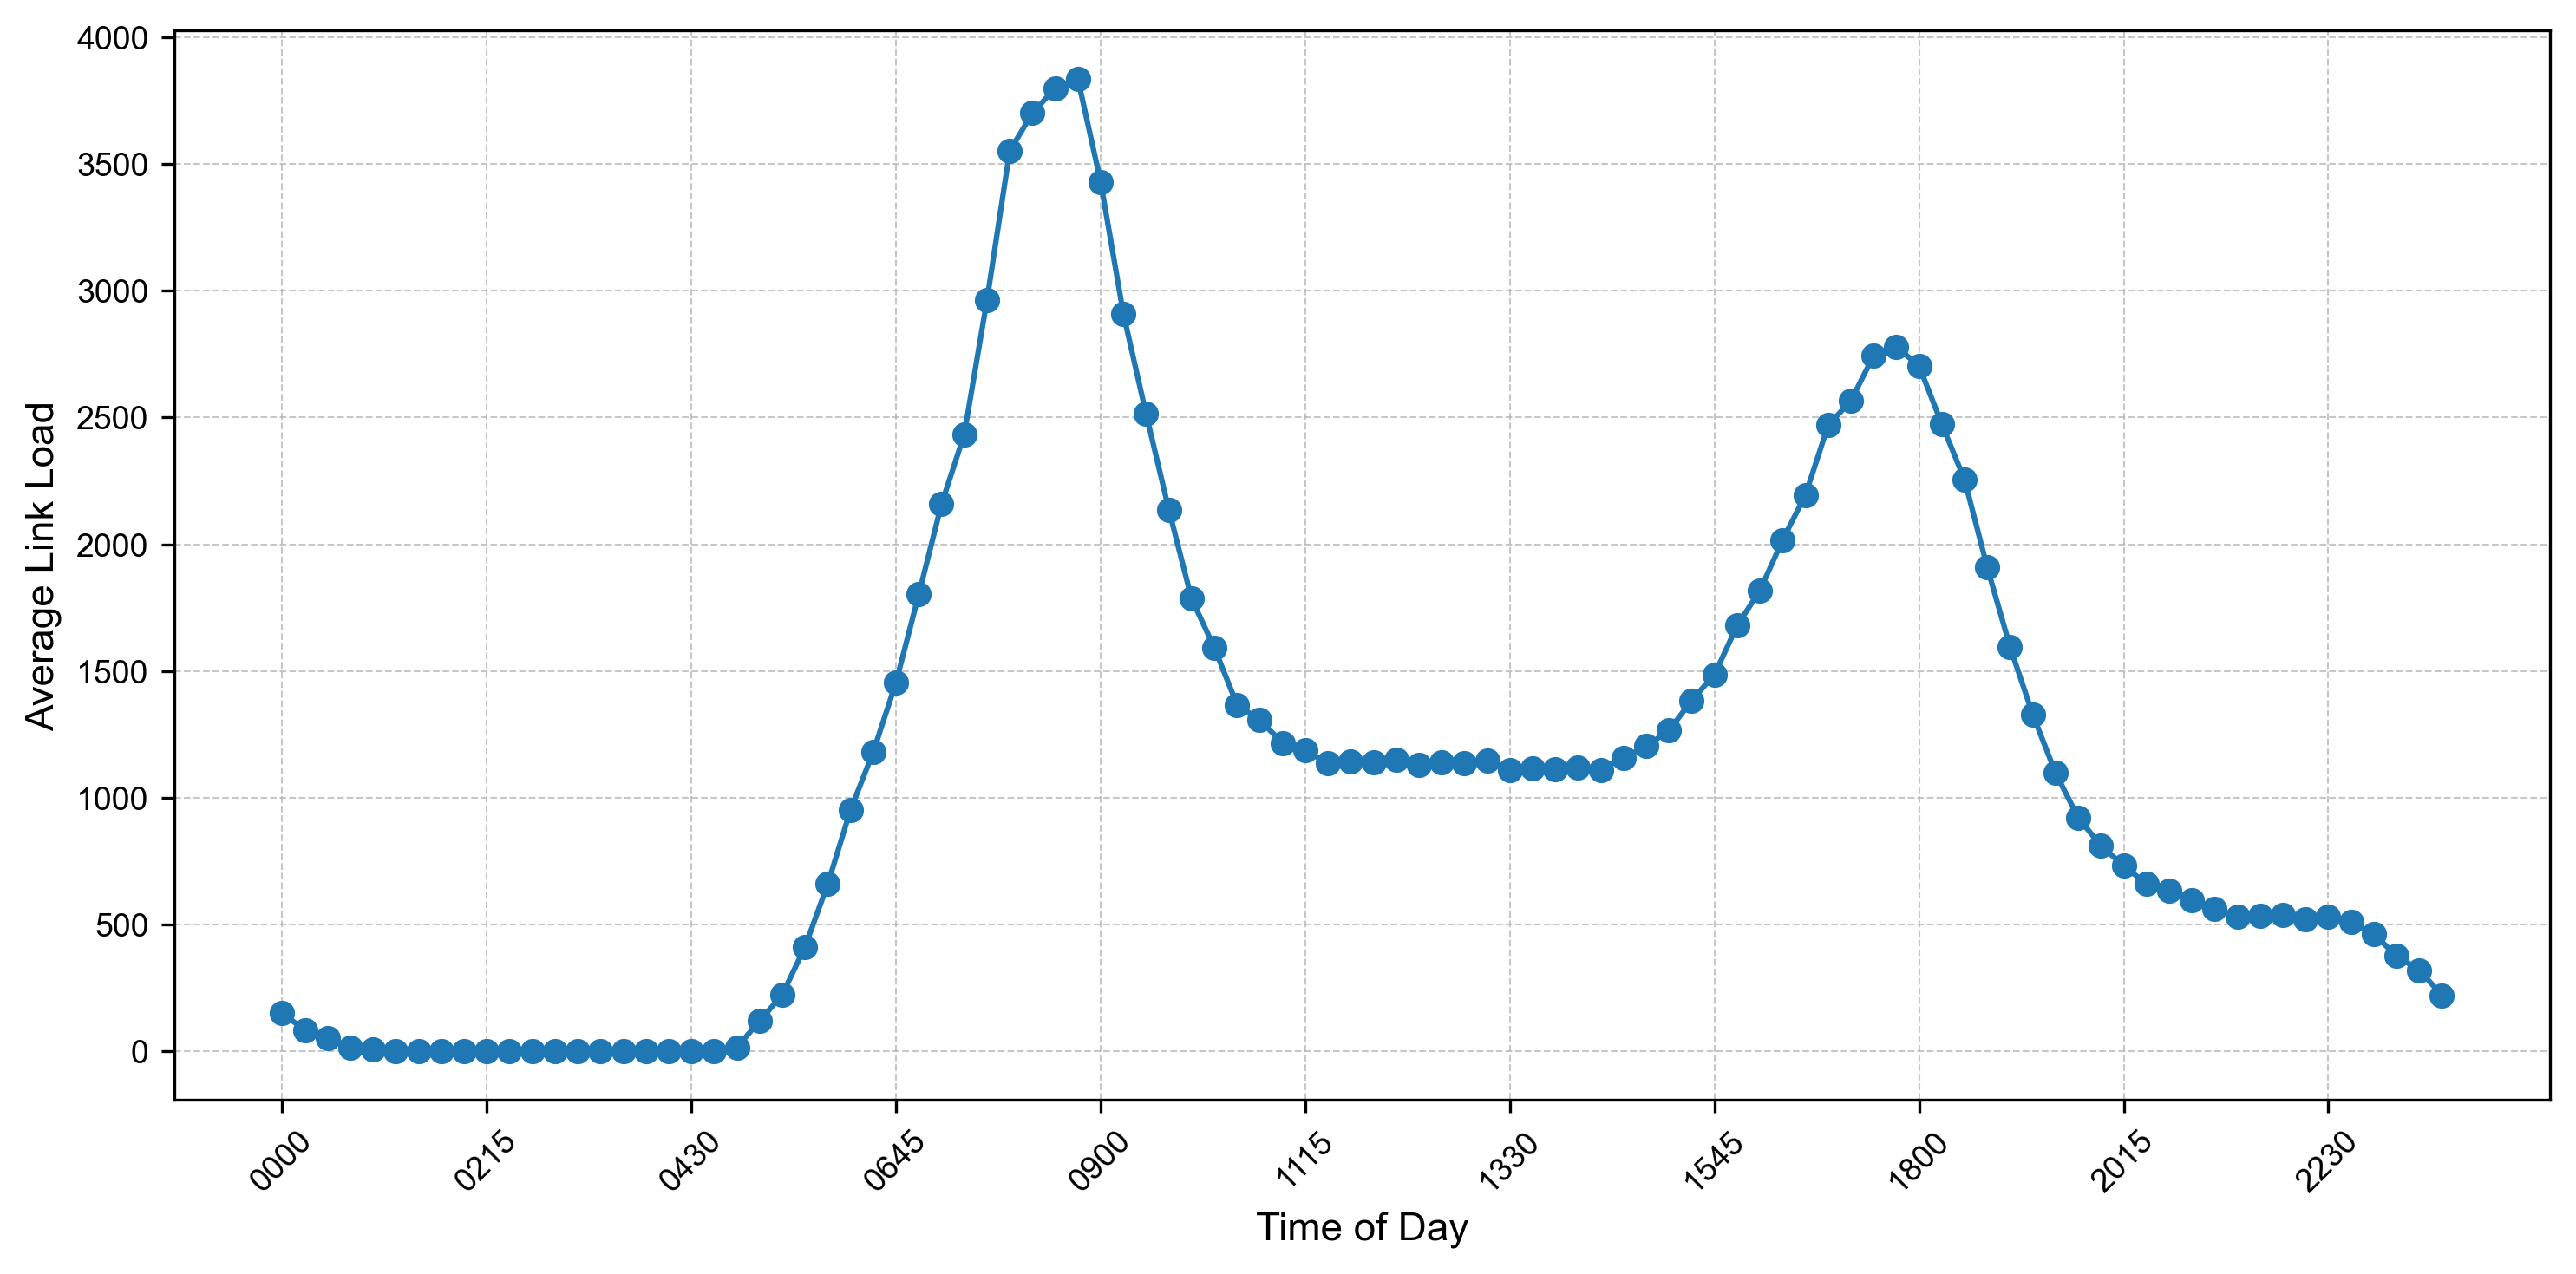

In [17]:
# plot the load 
tod = 'MTT'
start_station = 'Queensway'
end_station = 'Lancaster Gate'
year = '2019'
quarter_hours = pd.date_range(start='00:00', end='23:45', freq='15T').strftime('%H%M')
loads = []
for quarter_hour in quarter_hours:
    # get the load for the quarter hour
    load = llh.get_avg_link_load(start_station, end_station, quarter_hour, tod, year)
    loads.append(load)
# plot the load
plt.figure(figsize=(10, 5), dpi=300)
plt.rcParams.update({
    'font.family': 'Arial',      # or 'serif'
    'font.size': 10,             # or 11, to match LaTeX
    'axes.labelsize': 11,
    'axes.titlesize': 11,
    'xtick.labelsize': 9,
    'ytick.labelsize': 9,
    'legend.fontsize': 9
})
plt.plot(quarter_hours, loads, marker='o')
#plt.title(f'Average Link Load from {start_station} to {end_station} on {year} {tod}')
plt.xlabel('Time of Day')
plt.ylabel('Average Link Load')
plt.xticks(ticks=range(0, len(quarter_hours), len(quarter_hours)//10), labels=quarter_hours[::len(quarter_hours)//10], rotation=45)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()  # avoid label clipping
plt.savefig(f'plots/link_load_{start_station}_{end_station}_{year}_{tod}.png')
plt.show()

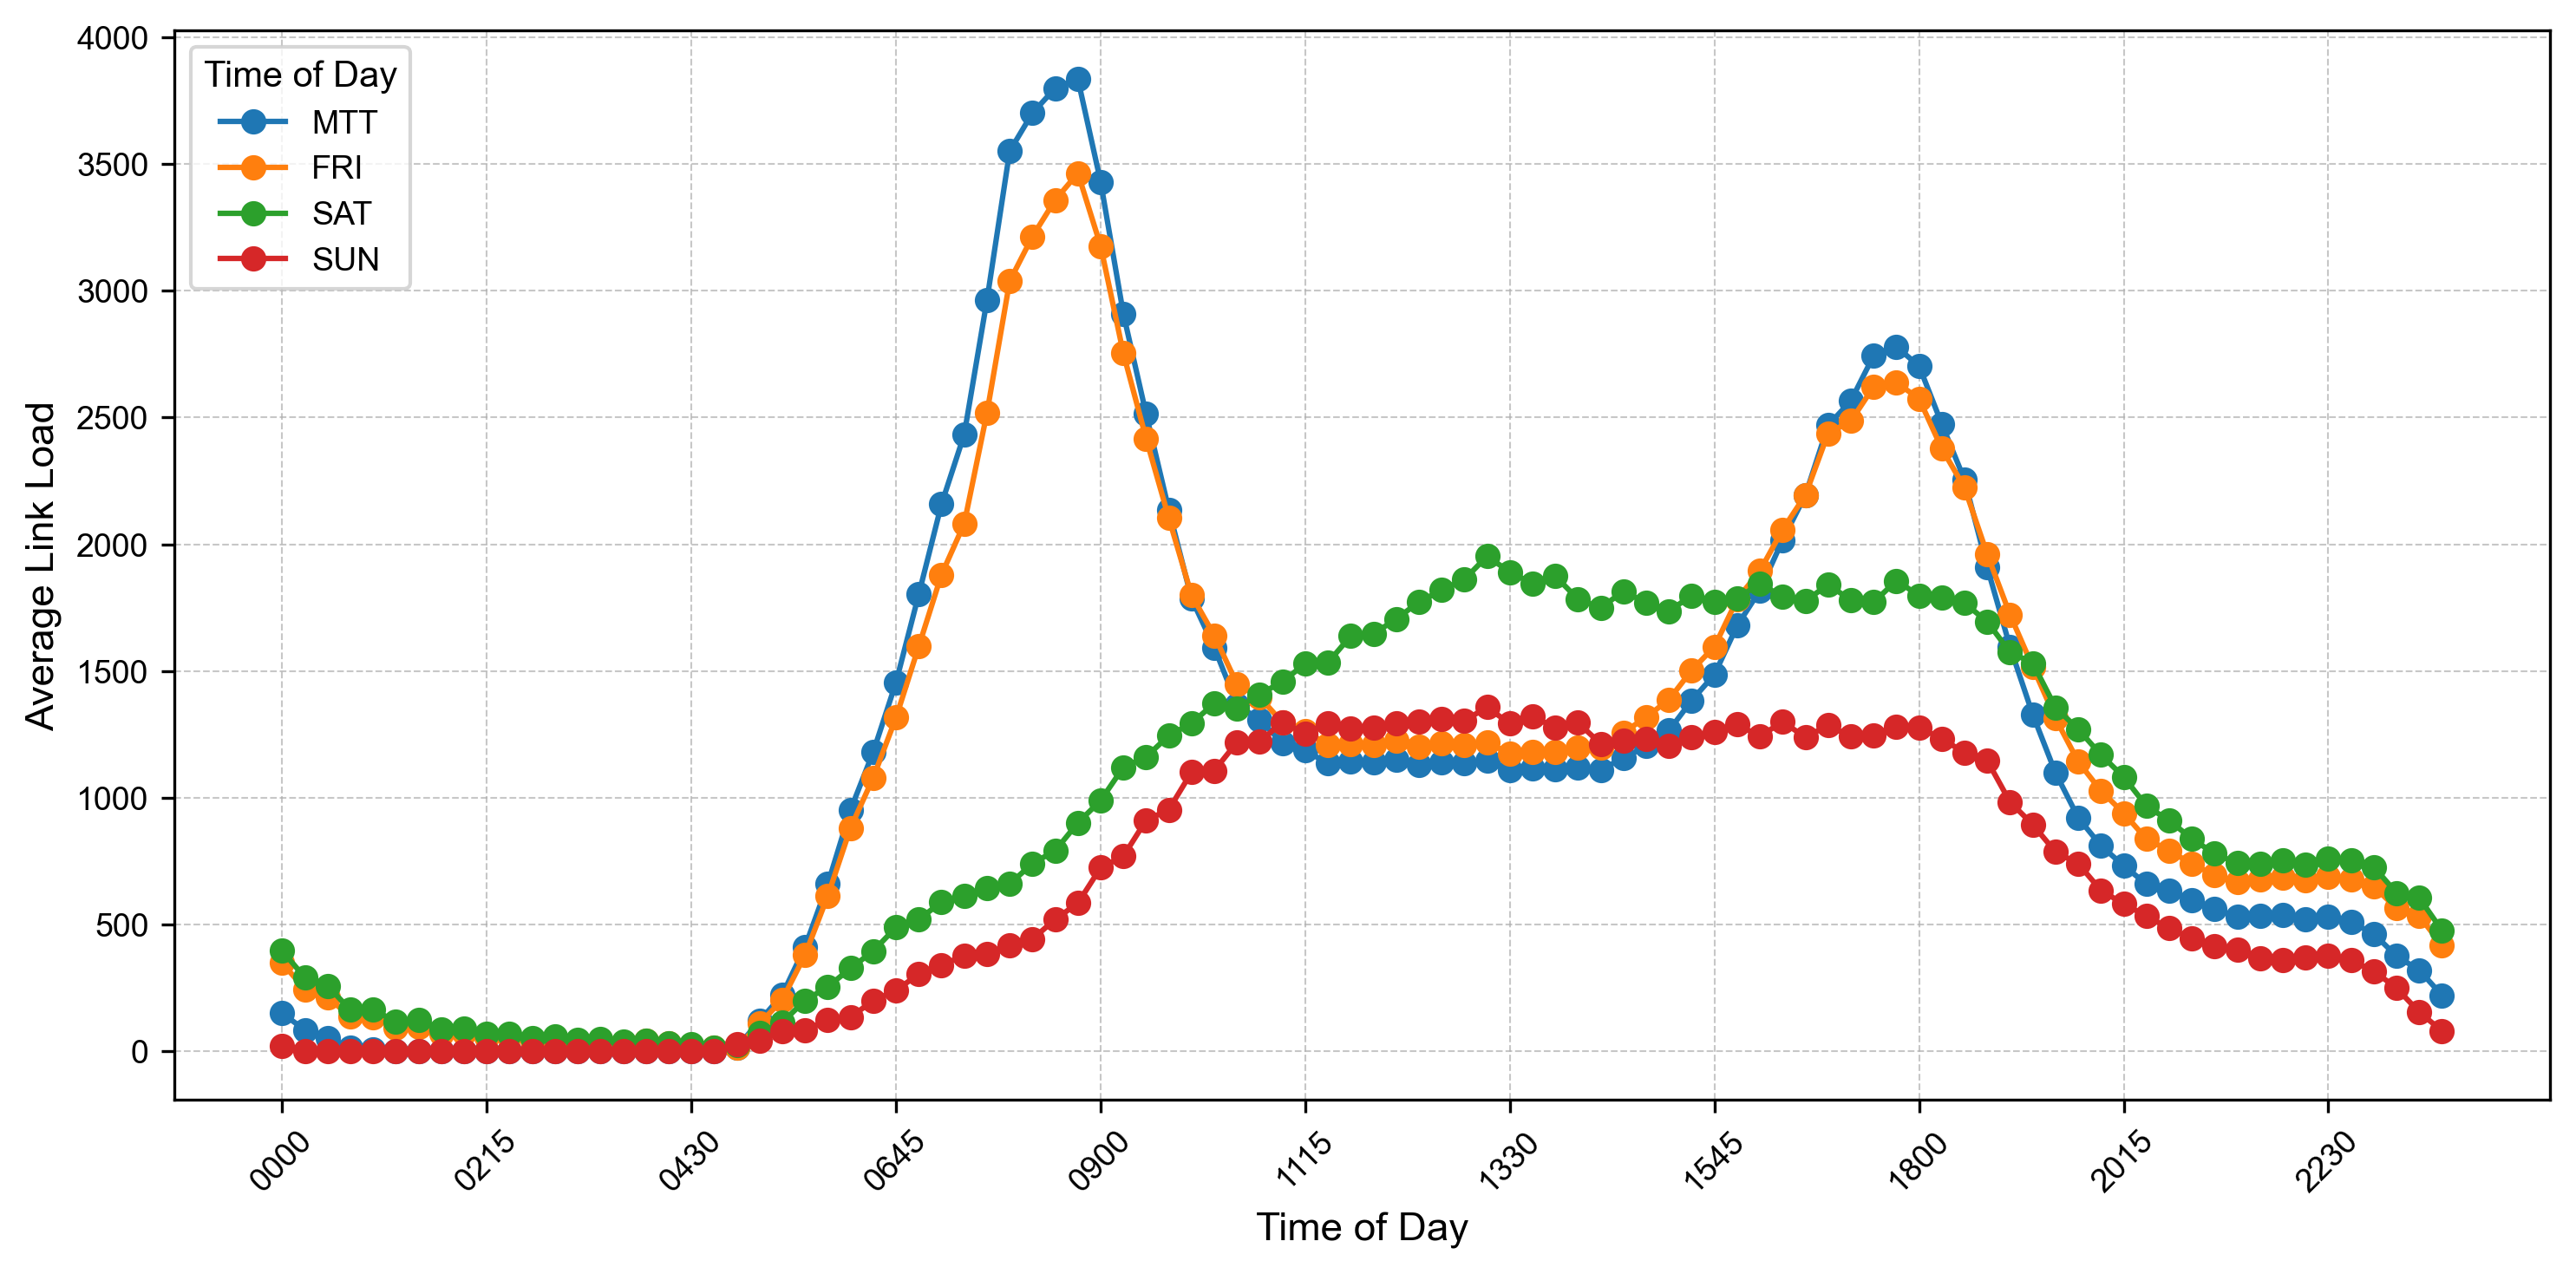

In [19]:
# plot the load 
tods = ['MTT', 'FRI', 'SAT', 'SUN']
start_station = 'Queensway'
end_station = 'Lancaster Gate'
year = '2019'
quarter_hours = pd.date_range(start='00:00', end='23:45', freq='15T').strftime('%H%M')

# plot the load
plt.figure(figsize=(10, 5), dpi=300)
plt.rcParams.update({
    'font.family': 'Arial',      # or 'serif'
    'font.size': 10,             # or 11, to match LaTeX
    'axes.labelsize': 11,
    'axes.titlesize': 11,
    'xtick.labelsize': 9,
    'ytick.labelsize': 9,
    'legend.fontsize': 9
})
for tod in tods:
    loads = []
    for quarter_hour in quarter_hours:
        # get the load for the quarter hour
        load = llh.get_avg_link_load(start_station, end_station, quarter_hour, tod, year)
        loads.append(load)
    # plot the load
    plt.plot(quarter_hours, loads, marker='o', label=tod)

#plt.title(f'Average Link Load from {start_station} to {end_station} on {year} {tod}')
plt.xlabel('Time of Day')
plt.ylabel('Average Link Load')
plt.legend(title='Time of Day', loc='upper left')
plt.xticks(ticks=range(0, len(quarter_hours), len(quarter_hours)//10), labels=quarter_hours[::len(quarter_hours)//10], rotation=45)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()  # avoid label clipping
plt.savefig(f'plots/link_load_{start_station}_{end_station}_{year}_ALL.png')
plt.show()

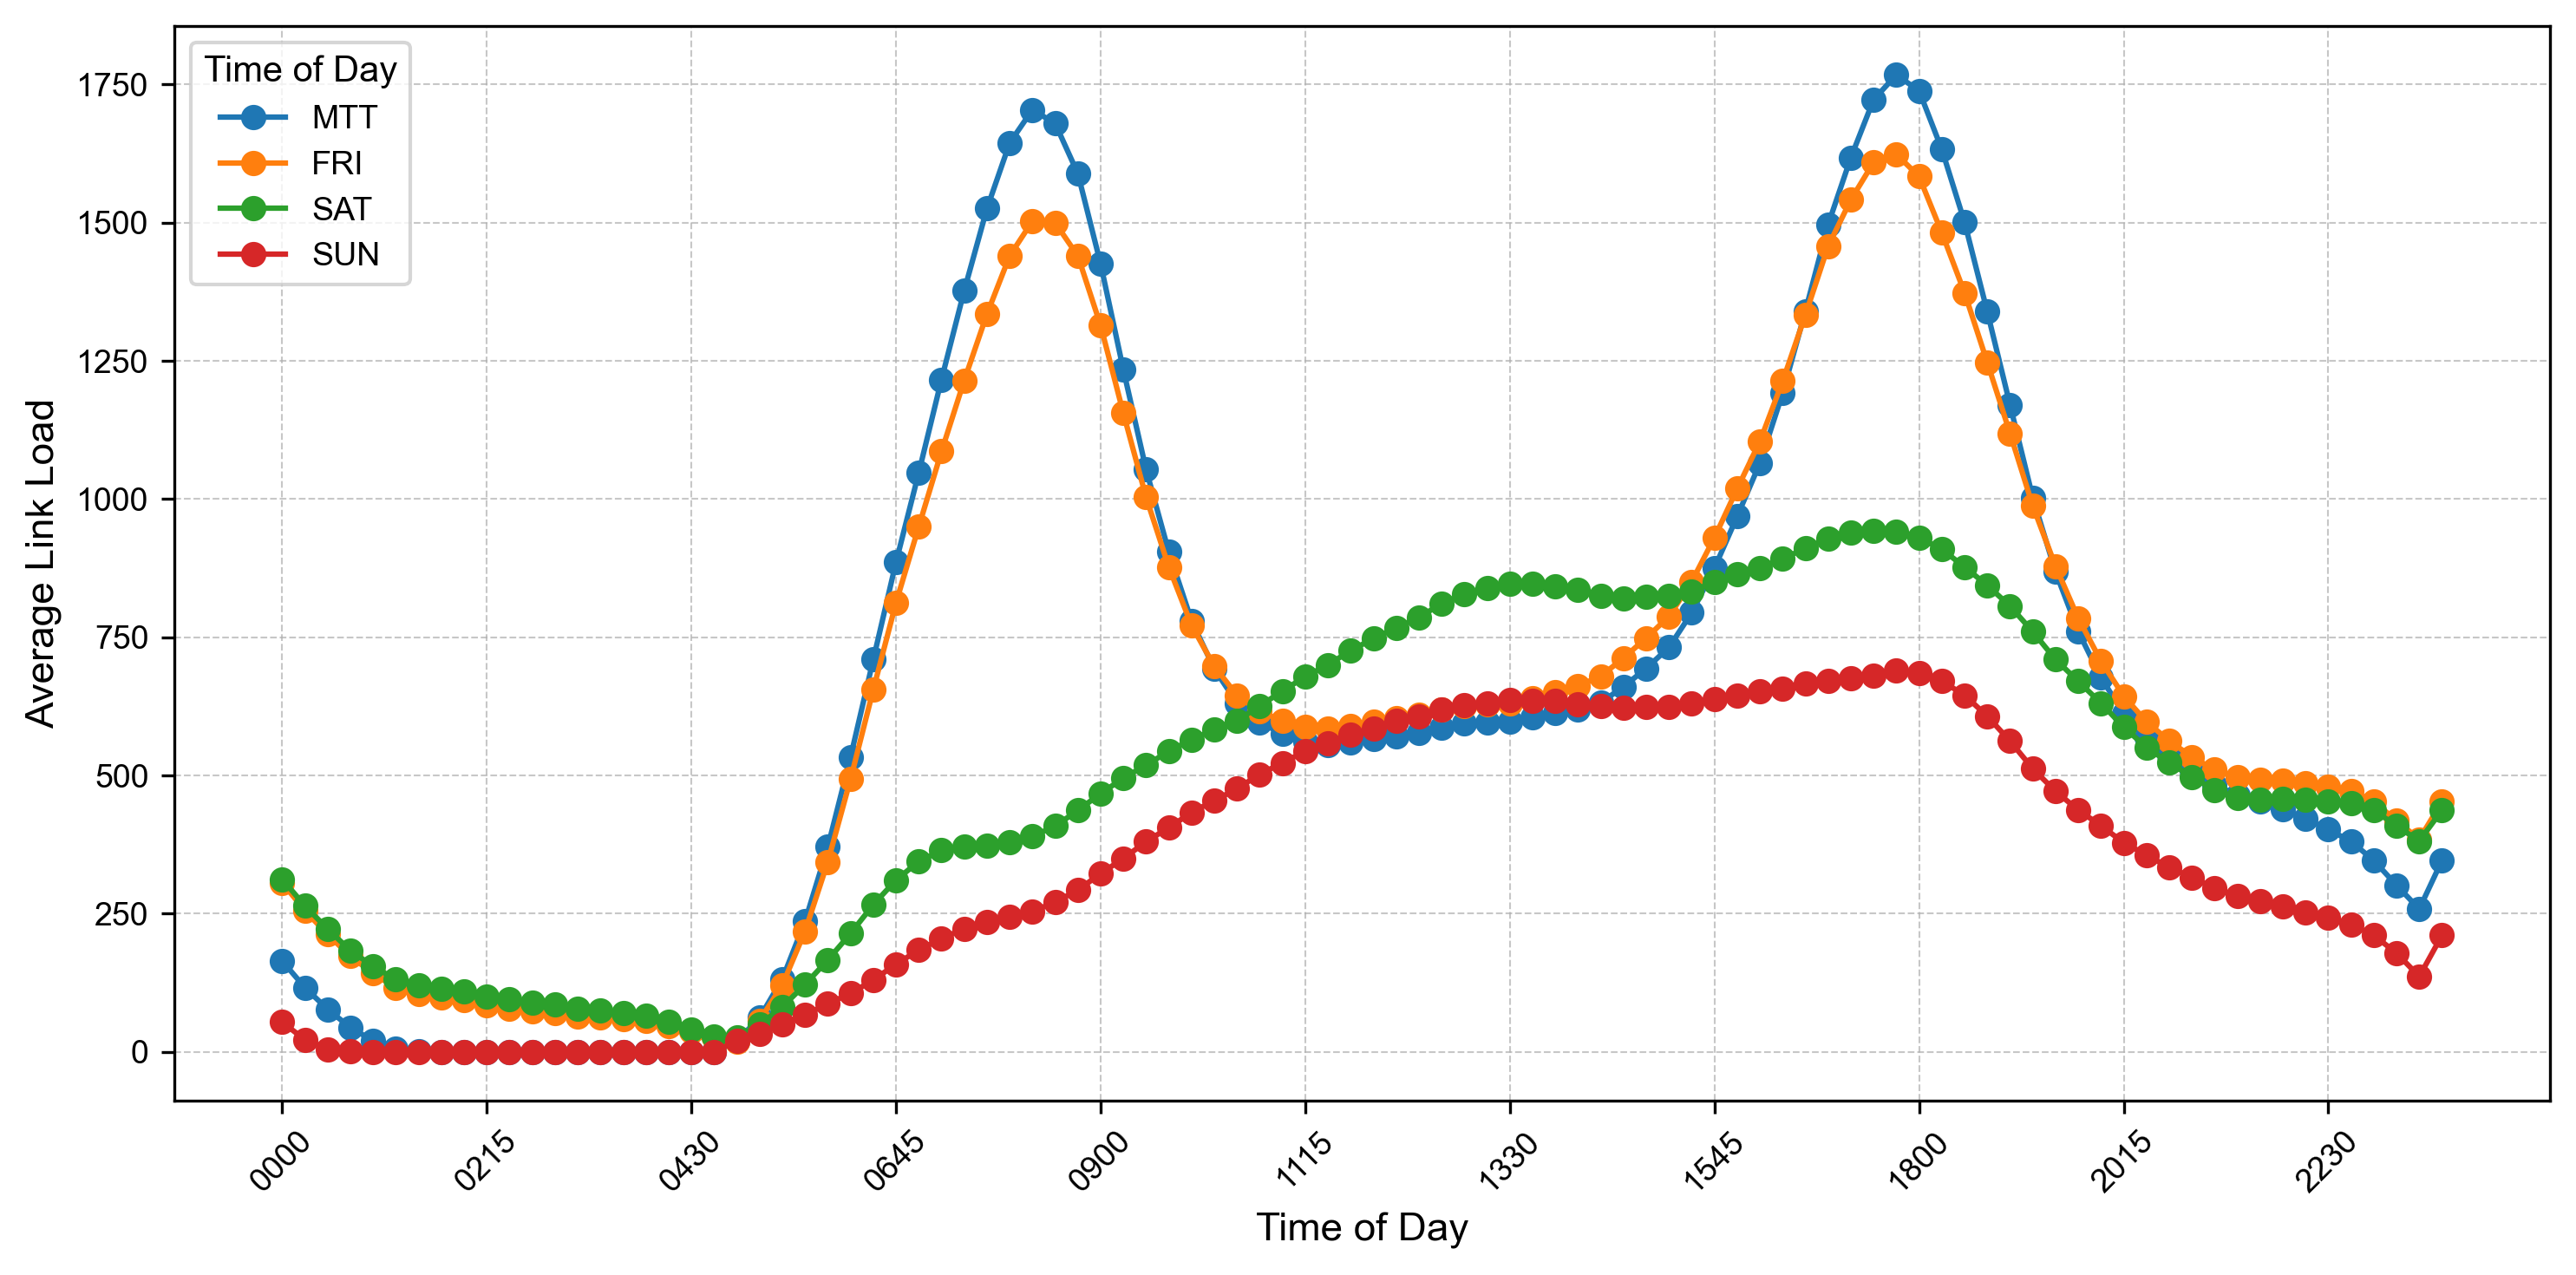

In [39]:
# plot the load averaged OVER ALL LINKS
tods = ['MTT', 'FRI', 'SAT', 'SUN']
stations = llh.get_all_stations()
directions = ['EB', 'WB']
year = '2019'
quarter_hours = pd.date_range(start='00:00', end='23:45', freq='15T').strftime('%H%M').to_list()
quarter_hours[-1] = '2345-0000'

# plot the load
plt.figure(figsize=(10, 5), dpi=300)
plt.rcParams.update({
    'font.family': 'Arial',      # or 'serif'
    'font.size': 10,             # or 11, to match LaTeX
    'axes.labelsize': 11,
    'axes.titlesize': 11,
    'xtick.labelsize': 9,
    'ytick.labelsize': 9,
    'legend.fontsize': 9
})
for tod in tods:
    loads = []
    for quarter_hour in quarter_hours:
        qh = llh.get_quaterhour(quarter_hour)
        df = llh.dfs[year][tod][qh].apply(lambda x: int(x.replace('\u202f', '').replace(' ', '')) if isinstance(x, str) else x)
        #print(qh, df.mean())
        loads.append(df.mean())
    plt.plot(quarter_hours, loads, marker='o', label=tod)
#plt.title(f'Average Link Load from {start_station} to {end_station} on {year} {tod}')
plt.xlabel('Time of Day')
plt.ylabel('Average Link Load')
plt.legend(title='Time of Day', loc='upper left')
plt.xticks(ticks=range(0, len(quarter_hours), len(quarter_hours)//10), labels=quarter_hours[::len(quarter_hours)//10], rotation=45)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()  # avoid label clipping
plt.savefig(f'plots/link_load_evolution_{year}_ALL.png')
plt.show()

In [42]:
ret, found = taps.get_entries_exits("Notting Hill Gate", "02/01/2022")
print(found)
print(ret)

True
{'entries': 5435, 'exits': 5755}


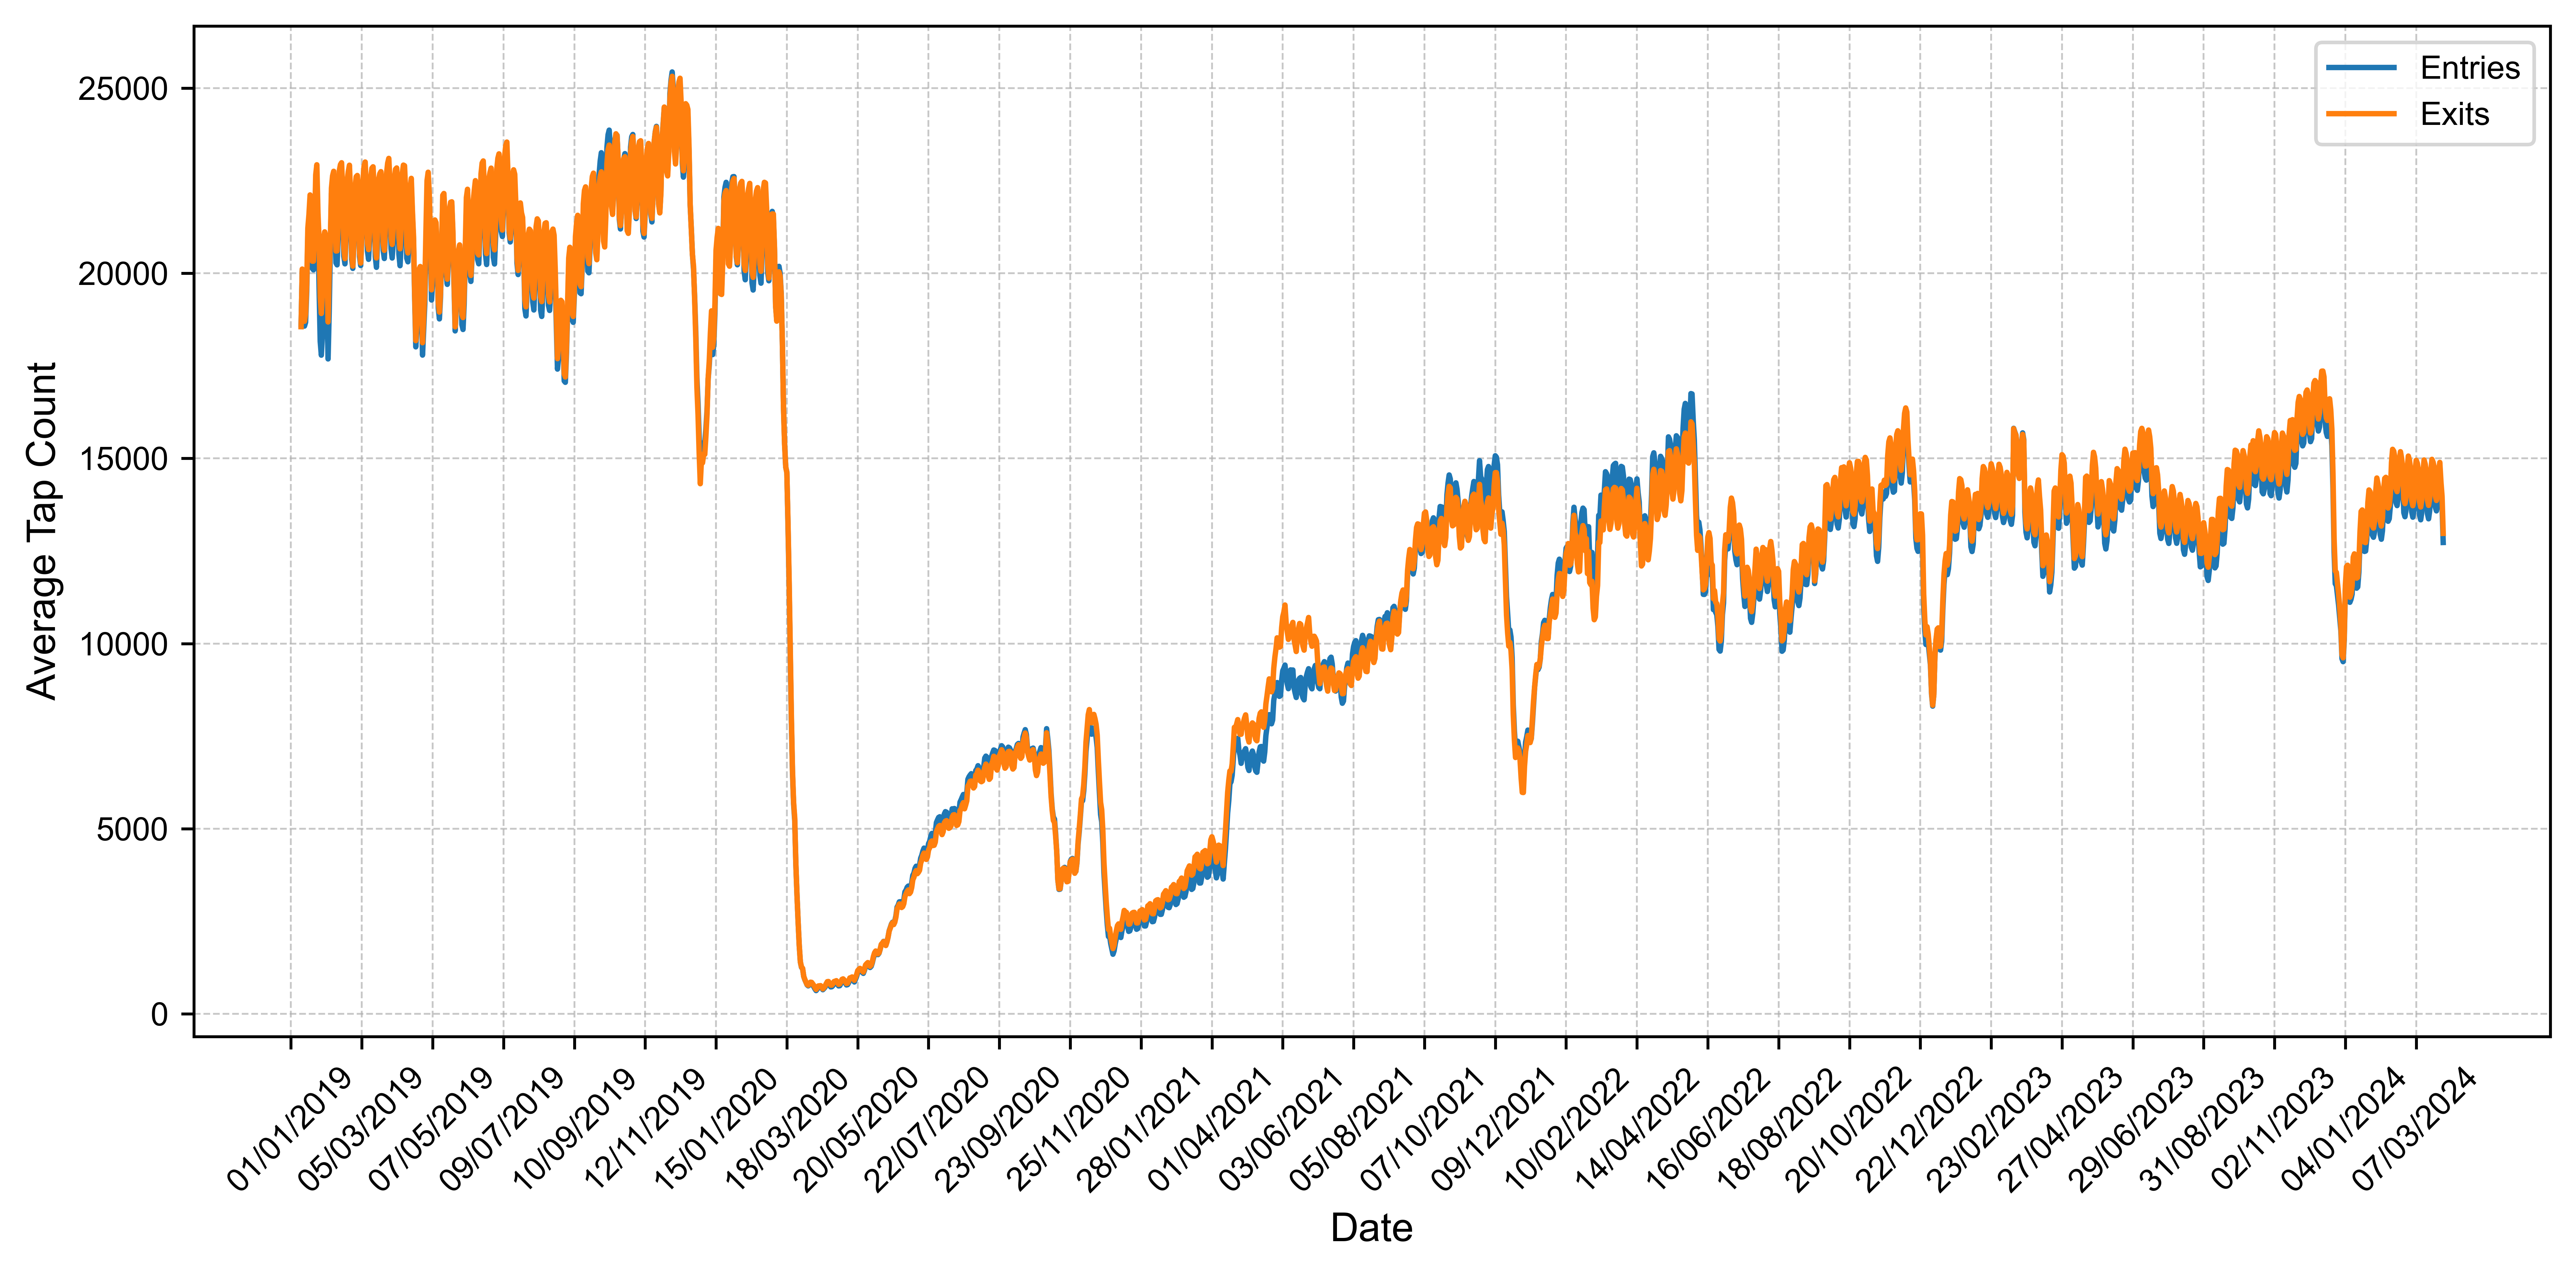

In [113]:
years = ['2019', '2020', '2021', '2022', '2023', '2024']

plt.figure(figsize=(10, 5), dpi=800)
plt.rcParams.update({
    'font.family': 'Arial',      # or 'serif'
    'font.size': 10,             # or 11, to match LaTeX
    'axes.labelsize': 11,
    'axes.titlesize': 11,
    'xtick.labelsize': 9,
    'ytick.labelsize': 9,
    'legend.fontsize': 9
})

avg_entries = taps.df[(taps.df['EntryExit'] == 'Entry')].groupby('TravelDate')['TapCount'].mean()
avg_exits = taps.df[(taps.df['EntryExit'] == 'Exit')].groupby('TravelDate')['TapCount'].mean()
avg_entries.sort_index(inplace=True, key = lambda x: pd.to_datetime(x, format='%d/%m/%Y'))
avg_exits.sort_index(inplace=True, key = lambda x: pd.to_datetime(x, format='%d/%m/%Y'))


avg_entries = avg_entries.rolling(window=10).mean()
avg_exits = avg_exits.rolling(window=10).mean()


plt.plot(avg_entries, label='Entries')
plt.plot(avg_exits, label='Exits')
plt.xlabel('Date')
plt.ylabel('Average Tap Count')
n_label = 30
plt.xticks(ticks=range(0, len(avg_entries), len(avg_entries)//n_label), labels=avg_entries.index[::len(avg_entries)//n_label], rotation=45)
plt.tight_layout()  # avoid label clipping
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.savefig(f'plots/taps_evolution_{years[0]}_{years[-1]}.png')
plt.show()

In [114]:
print(len(llh.get_all_stations()))

49


In [1]:
wh = WeatherHandler()

NameError: name 'WeatherHandler' is not defined

In [123]:
stations = ['White City', 'Lancaster Gate', 'Queensway', 'West Acton', 'Leyton', 'Epping']
for station in stations:
    print(station, wh.station_weather_influence(station, '01/01/2019', '31/12/2023'))

White City ({'dry': 9085.541692789968, 'rainy': 9496.162162162162}, {'dry': 9014.803134796239, 'rainy': 9509.32882882883})
Lancaster Gate ({'dry': 5582.757132915797, 'rainy': 5202.047619047619}, {'dry': 5309.001391788448, 'rainy': 5059.1238095238095})
Queensway ({'dry': 7774.625, 'rainy': 7670.8093023255815}, {'dry': 8086.996657754011, 'rainy': 8016.572093023256})
West Acton ({'dry': 1441.1776937618147, 'rainy': 1497.6}, {'dry': 1406.0056710775048, 'rainy': 1460.240909090909})
Leyton ({'dry': 11212.410872313527, 'rainy': 11556.581818181818}, {'dry': 10499.267383059418, 'rainy': 10829.981818181817})
Epping ({'dry': 3504.4080604534006, 'rainy': 3612.931818181818}, {'dry': 3406.3960957178842, 'rainy': 3534.25})


In [130]:
stations = ['White City', 'Lancaster Gate', 'Queensway', 'West Acton', 'Leyton', 'Epping']
for station in stations:
    print(station, wh.station_weather_influence(station, '01/01/2019', '31/12/2019', 5))

White City ({'dry': 12779.725, 'rainy': 12983.59090909091}, {'dry': 12391.39375, 'rainy': 12744.636363636364})
Lancaster Gate ({'dry': 9332.728125, 'rainy': 9153.90909090909}, {'dry': 8734.35625, 'rainy': 8682.15909090909})
Queensway ({'dry': 11177.05625, 'rainy': 11336.068181818182}, {'dry': 11491.140625, 'rainy': 11590.704545454546})
West Acton ({'dry': 2282.785942492013, 'rainy': 2284.0}, {'dry': 2191.361022364217, 'rainy': 2195.232558139535})
Leyton ({'dry': 16224.974842767295, 'rainy': 16368.136363636364}, {'dry': 14486.154088050314, 'rainy': 14633.90909090909})
Epping ({'dry': 4896.09375, 'rainy': 4931.681818181818}, {'dry': 4645.0625, 'rainy': 4705.545454545455})


In [ ]:
stations = ['White City', 'Lancaster Gate', 'Queensway', 'West Acton', 'Leyton', 'Epping']
for station in stations:
    print(station, wh.station_weather_influence(station, '01/01/2022', '31/12/2022', 10))

White City ({'dry': 9875.308571428572, 'rainy': 11084.07142857143}, {'dry': 9743.951428571429, 'rainy': 11026.07142857143})
Lancaster Gate ({'dry': 5487.742028985507, 'rainy': 5164.357142857143}, {'dry': 5131.550724637681, 'rainy': 5116.642857142857})
Queensway ({'dry': 8462.508720930233, 'rainy': 8567.785714285714}, {'dry': 8729.462209302326, 'rainy': 8868.642857142857})
West Acton ({'dry': 1427.142857142857, 'rainy': 1587.857142857143}, {'dry': 1389.8057142857142, 'rainy': 1533.642857142857})
Leyton ({'dry': 11174.52034883721, 'rainy': 11598.0}, {'dry': 10665.017441860466, 'rainy': 11317.57142857143})
Epping ({'dry': 3860.7947976878613, 'rainy': 4007.285714285714}, {'dry': 3720.748554913295, 'rainy': 3805.0714285714284})


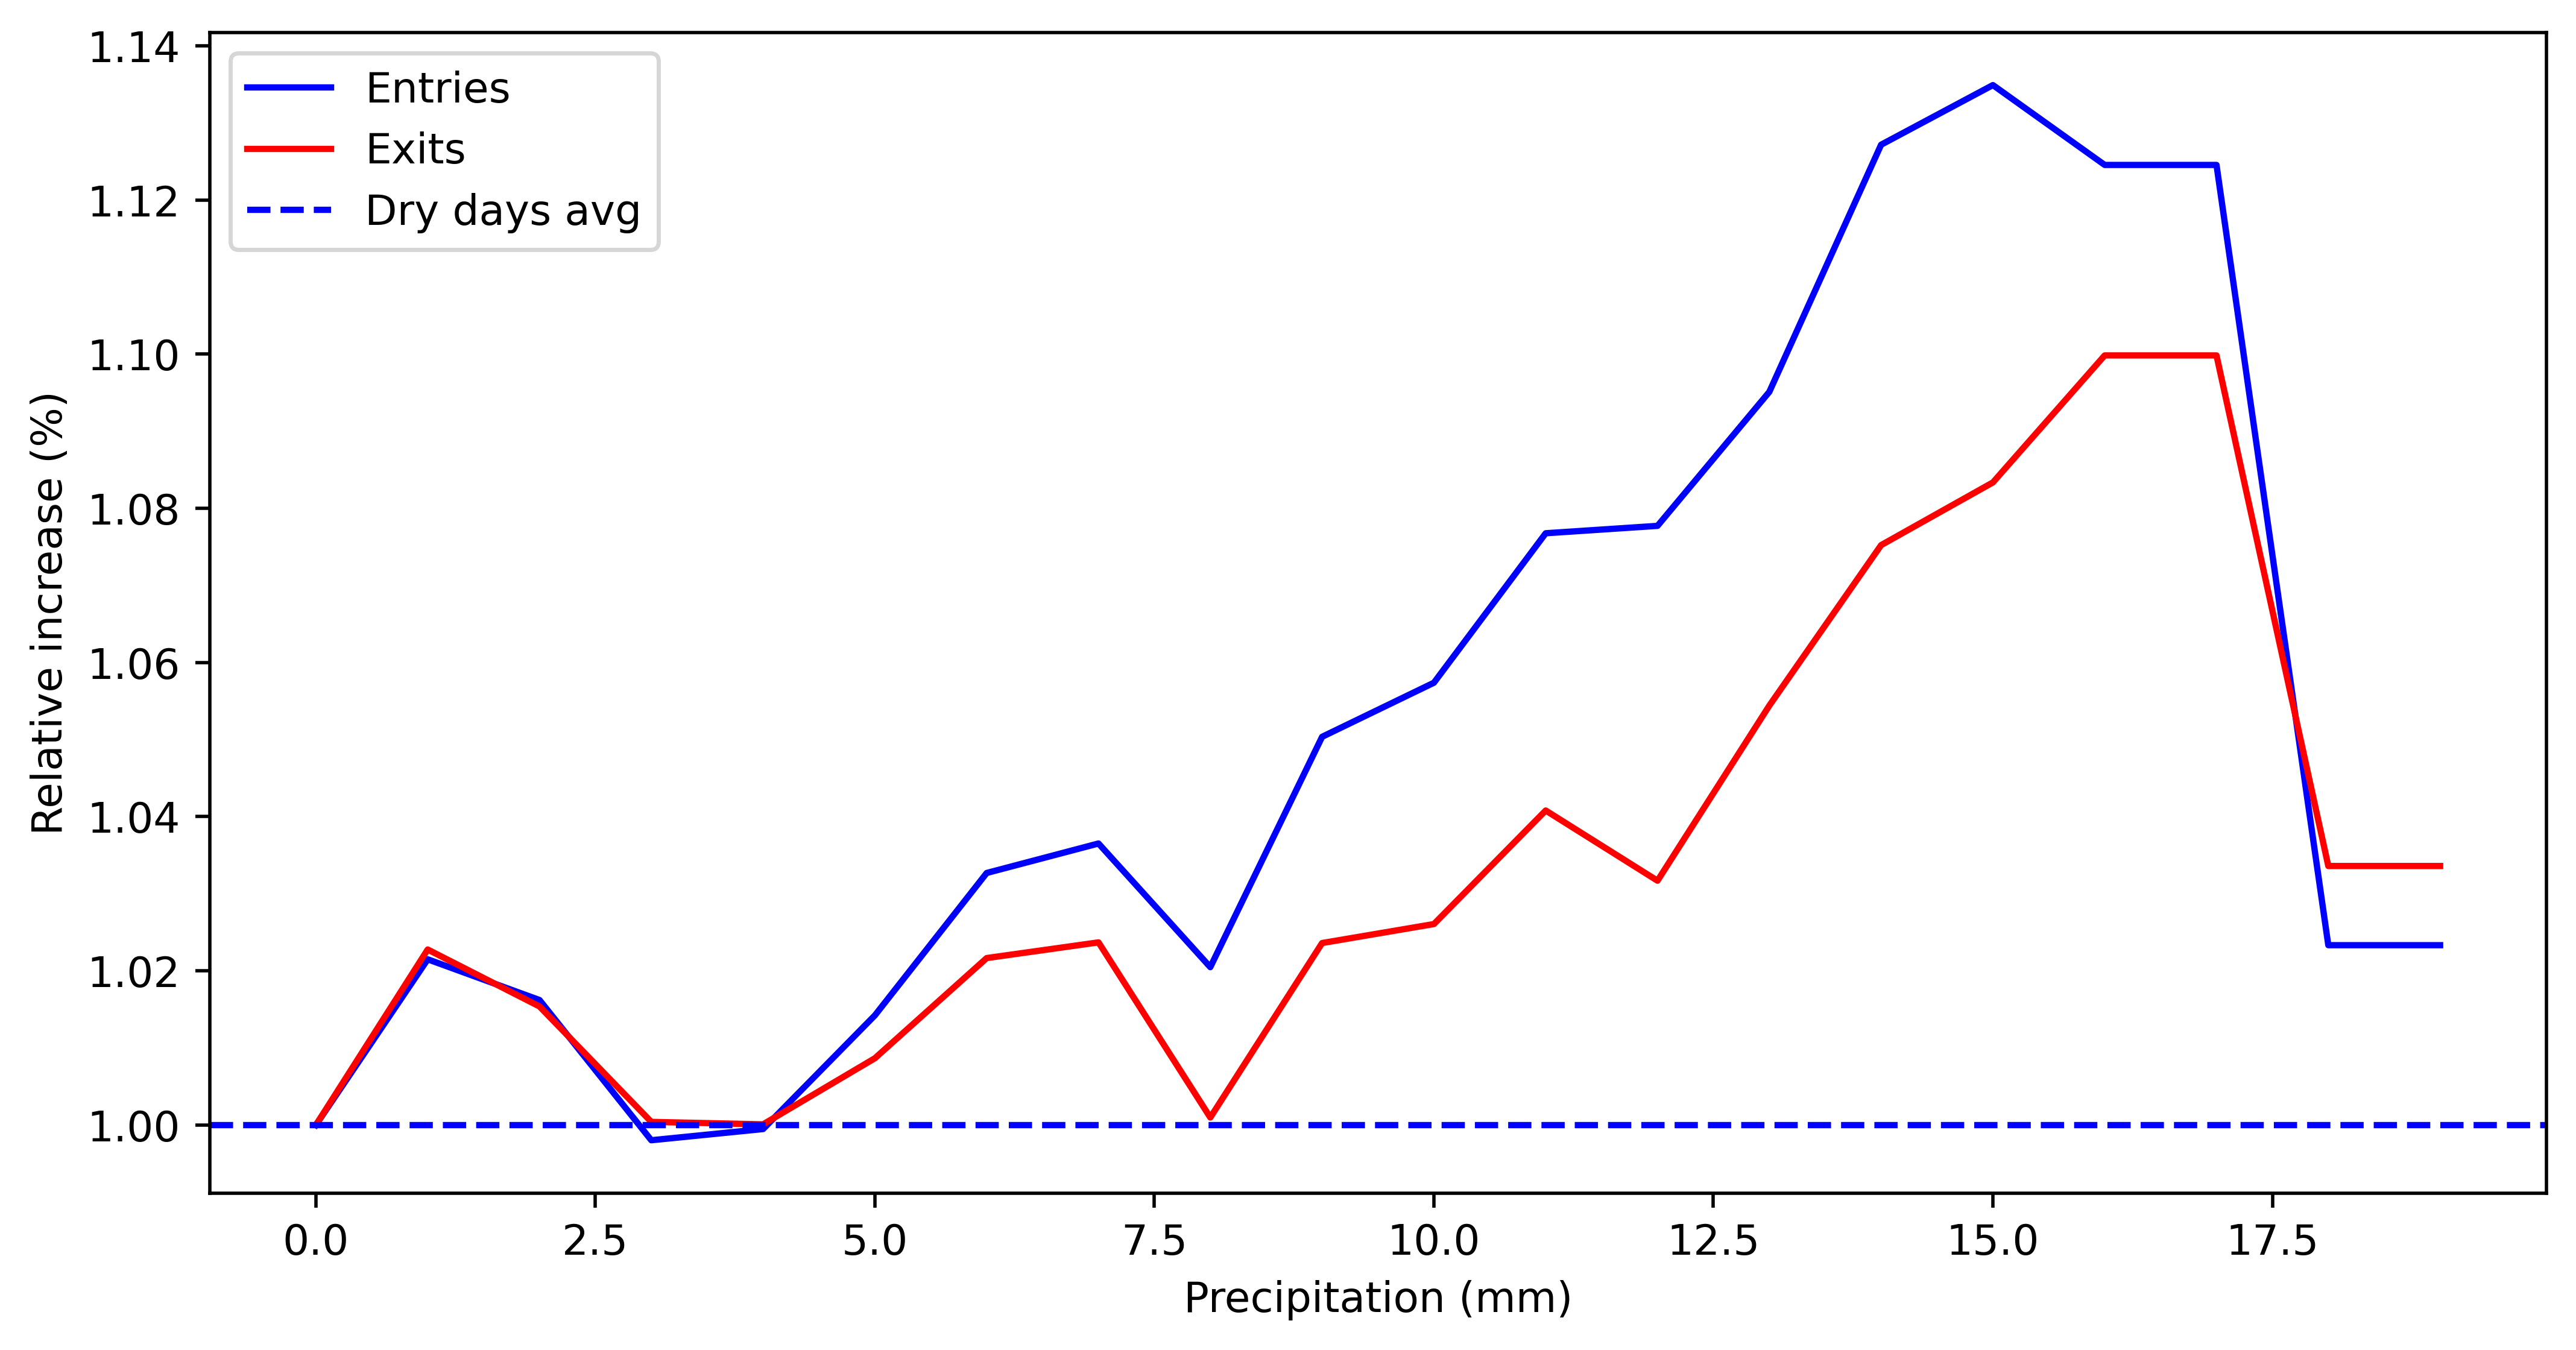

In [12]:
from events import *
import matplotlib.pyplot as plt
wh2 = WeatherHandler()
#plt.figure(figsize=(10, 5), dpi=500)
d = wh2.get_threshold_influence('Queensway', '01/01/2019', '31/12/2019', relative = True, plot = False, precision = 1)
entries_coef = d['entries']
exits_coefs = d['exits']
thresholds = [i for i in range(0, 20, 1)]
plt.figure(figsize=(10, 5), dpi=500)

plt.plot(thresholds, entries_coef, label='Entries', color='b')
plt.plot(thresholds, exits_coefs, label='Exits', color='r')
plt.axhline(y=1, color='b', linestyle='--', label = 'Dry days avg')
plt.legend()
plt.xlabel('Precipitation (mm)')
plt.ylabel('Relative increase (%)')
plt.savefig(f'plots/threshold_influence_Queensway_2019.png')



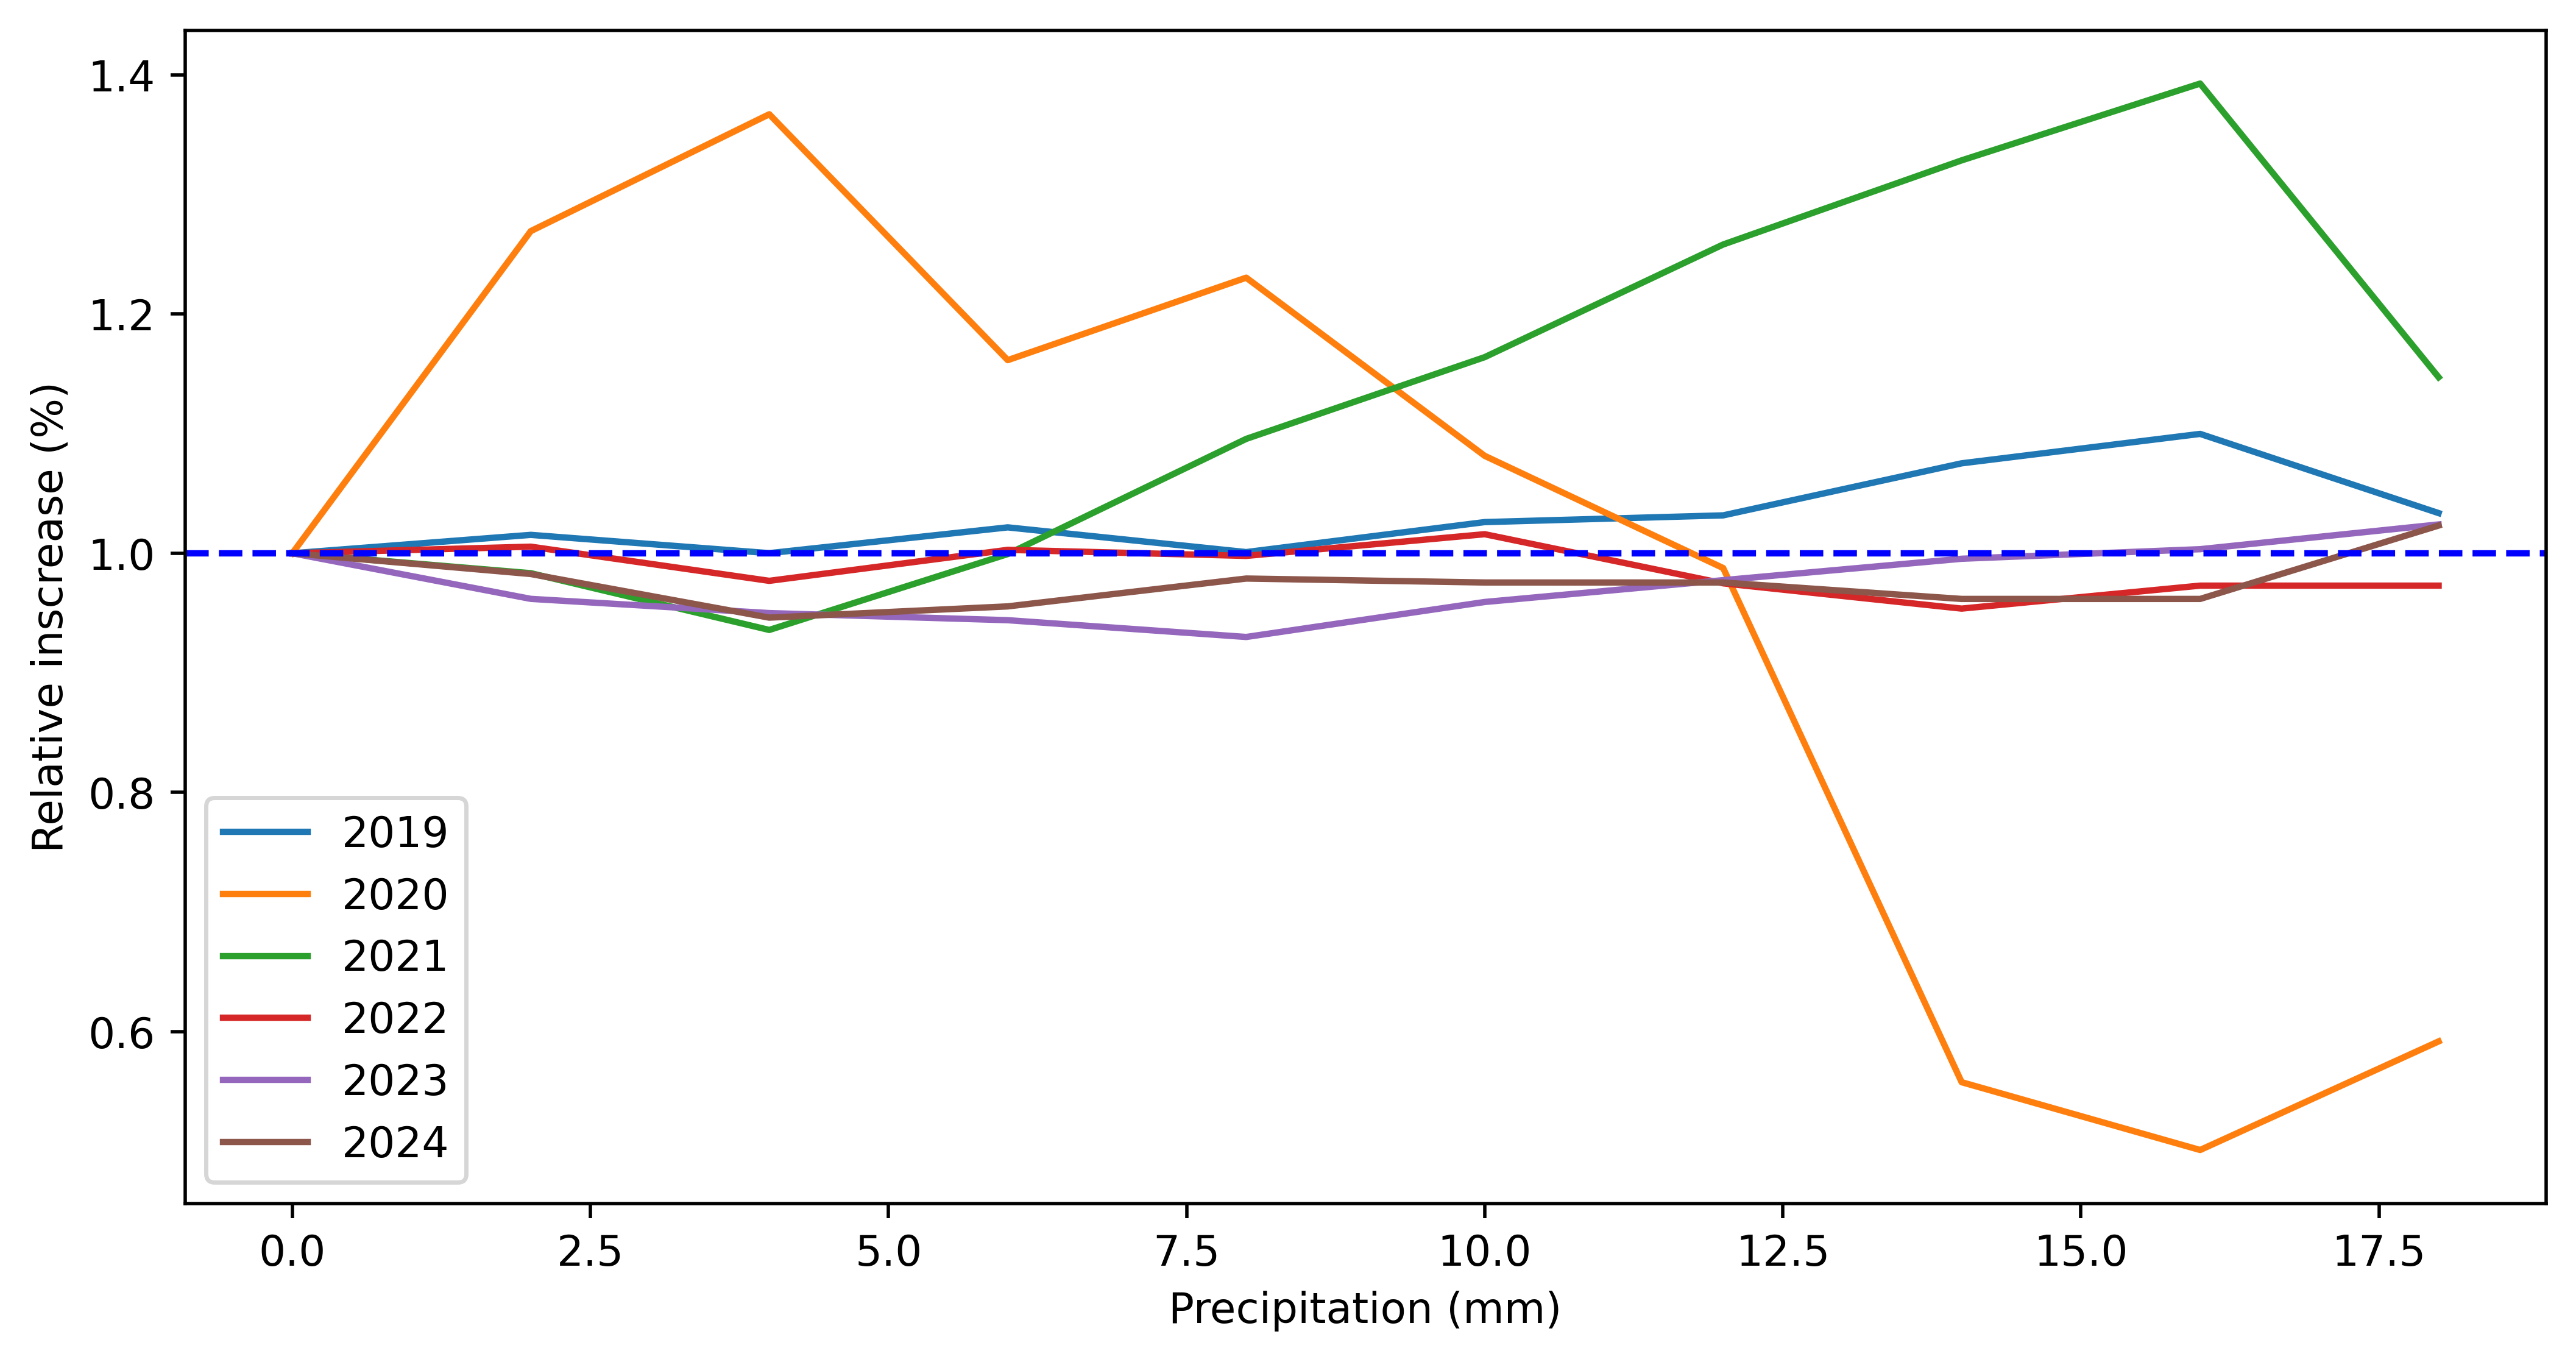

In [7]:
from events import *
import matplotlib.pyplot as plt
wh2 = WeatherHandler()
plt.figure(figsize=(10, 5), dpi=500)
wh2.plot_threshold_influence_evolution("Queensway", type='exits', precision = 2)

In [1]:
from tools import *
from scraper import *
from data import *
from model import *
from events import *
import pandas as pd
import time
import matplotlib.pyplot as plt


import numpy as np
import datetime as dt
from events import *
import matplotlib.pyplot as plt
wh2 = WeatherHandler()

In [2]:
from events import *
import matplotlib.pyplot as plt
wh2 = WeatherHandler()
wh2.find_steadiest_thresholh("Queensway", precision = 1)

Best entry threshold: 11 mm, std: 0.05755203158559954
Best exit threshold: 11 mm, std: 0.0689174294817992


(11,
 11,
 array([0.14855029, 0.10410785, 0.13454962, 0.14995447, 0.11427323,
        0.07324549, 0.09539883, 0.09652407, 0.07072374, 0.05755203,
        0.09262216, 0.07581983, 0.18695491, 0.20098265, 0.20217059,
        0.23136751, 0.23136751, 0.15597435, 0.16214499]),
 array([0.15400328, 0.10564243, 0.13674575, 0.15258217, 0.11185168,
        0.07126217, 0.09441721, 0.09876109, 0.07476161, 0.06891743,
        0.10499318, 0.10209847, 0.21119093, 0.22739259, 0.22835543,
        0.26293376, 0.26293376, 0.17520492, 0.17640087]))

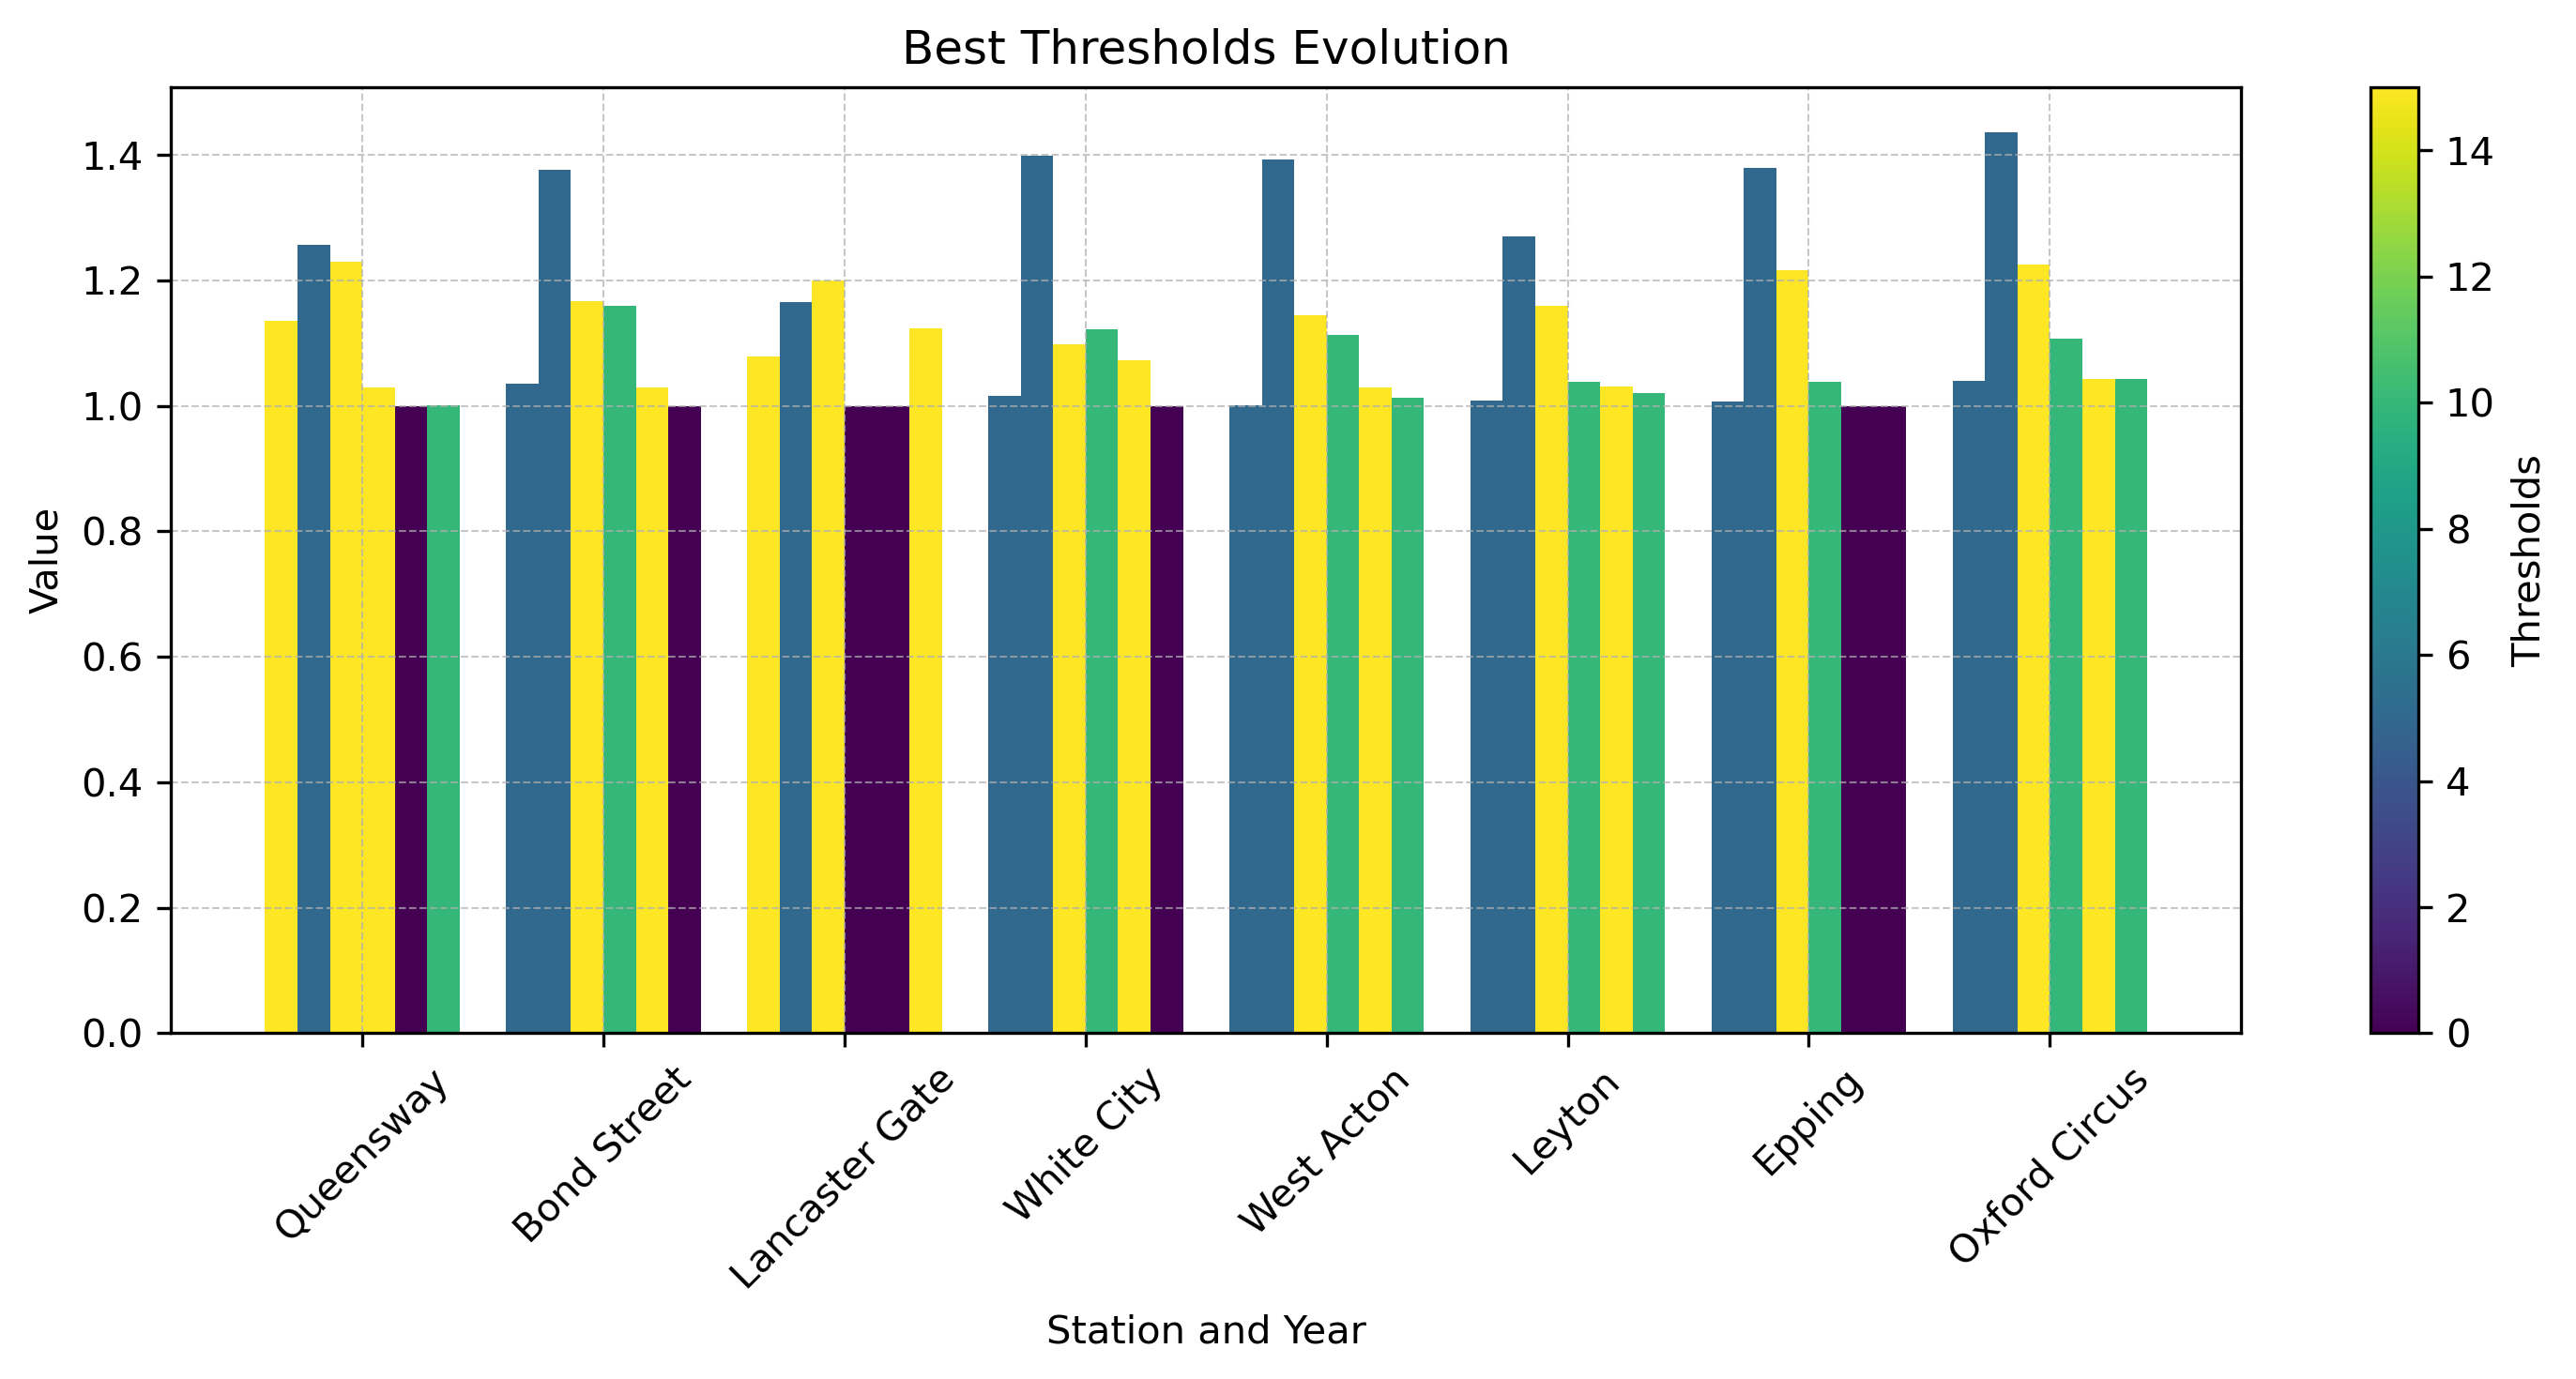

In [ ]:
# get best thresholds evolution through the years
stations = ['Queensway', 'Bond Street', 'Lancaster Gate', 'White City', 'West Acton', 'Leyton', 'Epping', 'Oxford Circus']
years = ['2019', '2020', '2021', '2022', '2023', '2024']
precision = 2
thresholds = [i for i in range(0, 20, precision)]
x_labels = []
x_positions = []
bar_width = 0.35  # width of each bar
station_spacing = 0.5  # spacing between stations
offset = 0  # offset for bar positions

thresholds_colors = {threshold: plt.cm.viridis(threshold / max(thresholds)) for threshold in thresholds}

plt.figure(figsize=(10, 5), dpi=300)
for station in stations:
    bars = []
    colors = []
    for year in years:
        start_date = f'01/01/{year}'
        end_date = f'31/12/{year}'
        entry_data, _ = wh2.station_best_thresholds(station, start_date, end_date, coefs=True, precision=precision)
        bars.append(entry_data[1])
        colors.append(thresholds_colors[entry_data[0]])
        x_labels.append(f'{station} {year}')
        x_positions.append(offset)
        offset += bar_width
    offset += station_spacing  # add spacing after each station's bars
    plt.bar(x_positions[-len(years):], bars, color=colors, width=bar_width)

plt.xlabel('Station and Year')
plt.ylabel('Value')
#plt.title('Best Thresholds Evolution')
plt.xticks(ticks=[(x_positions[i] + x_positions[i + len(years) - 1]) / 2 for i in range(0, len(x_positions), len(years))], 
           labels=stations, rotation=45)
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=min(thresholds), vmax=max(thresholds)))
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Thresholds')
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()



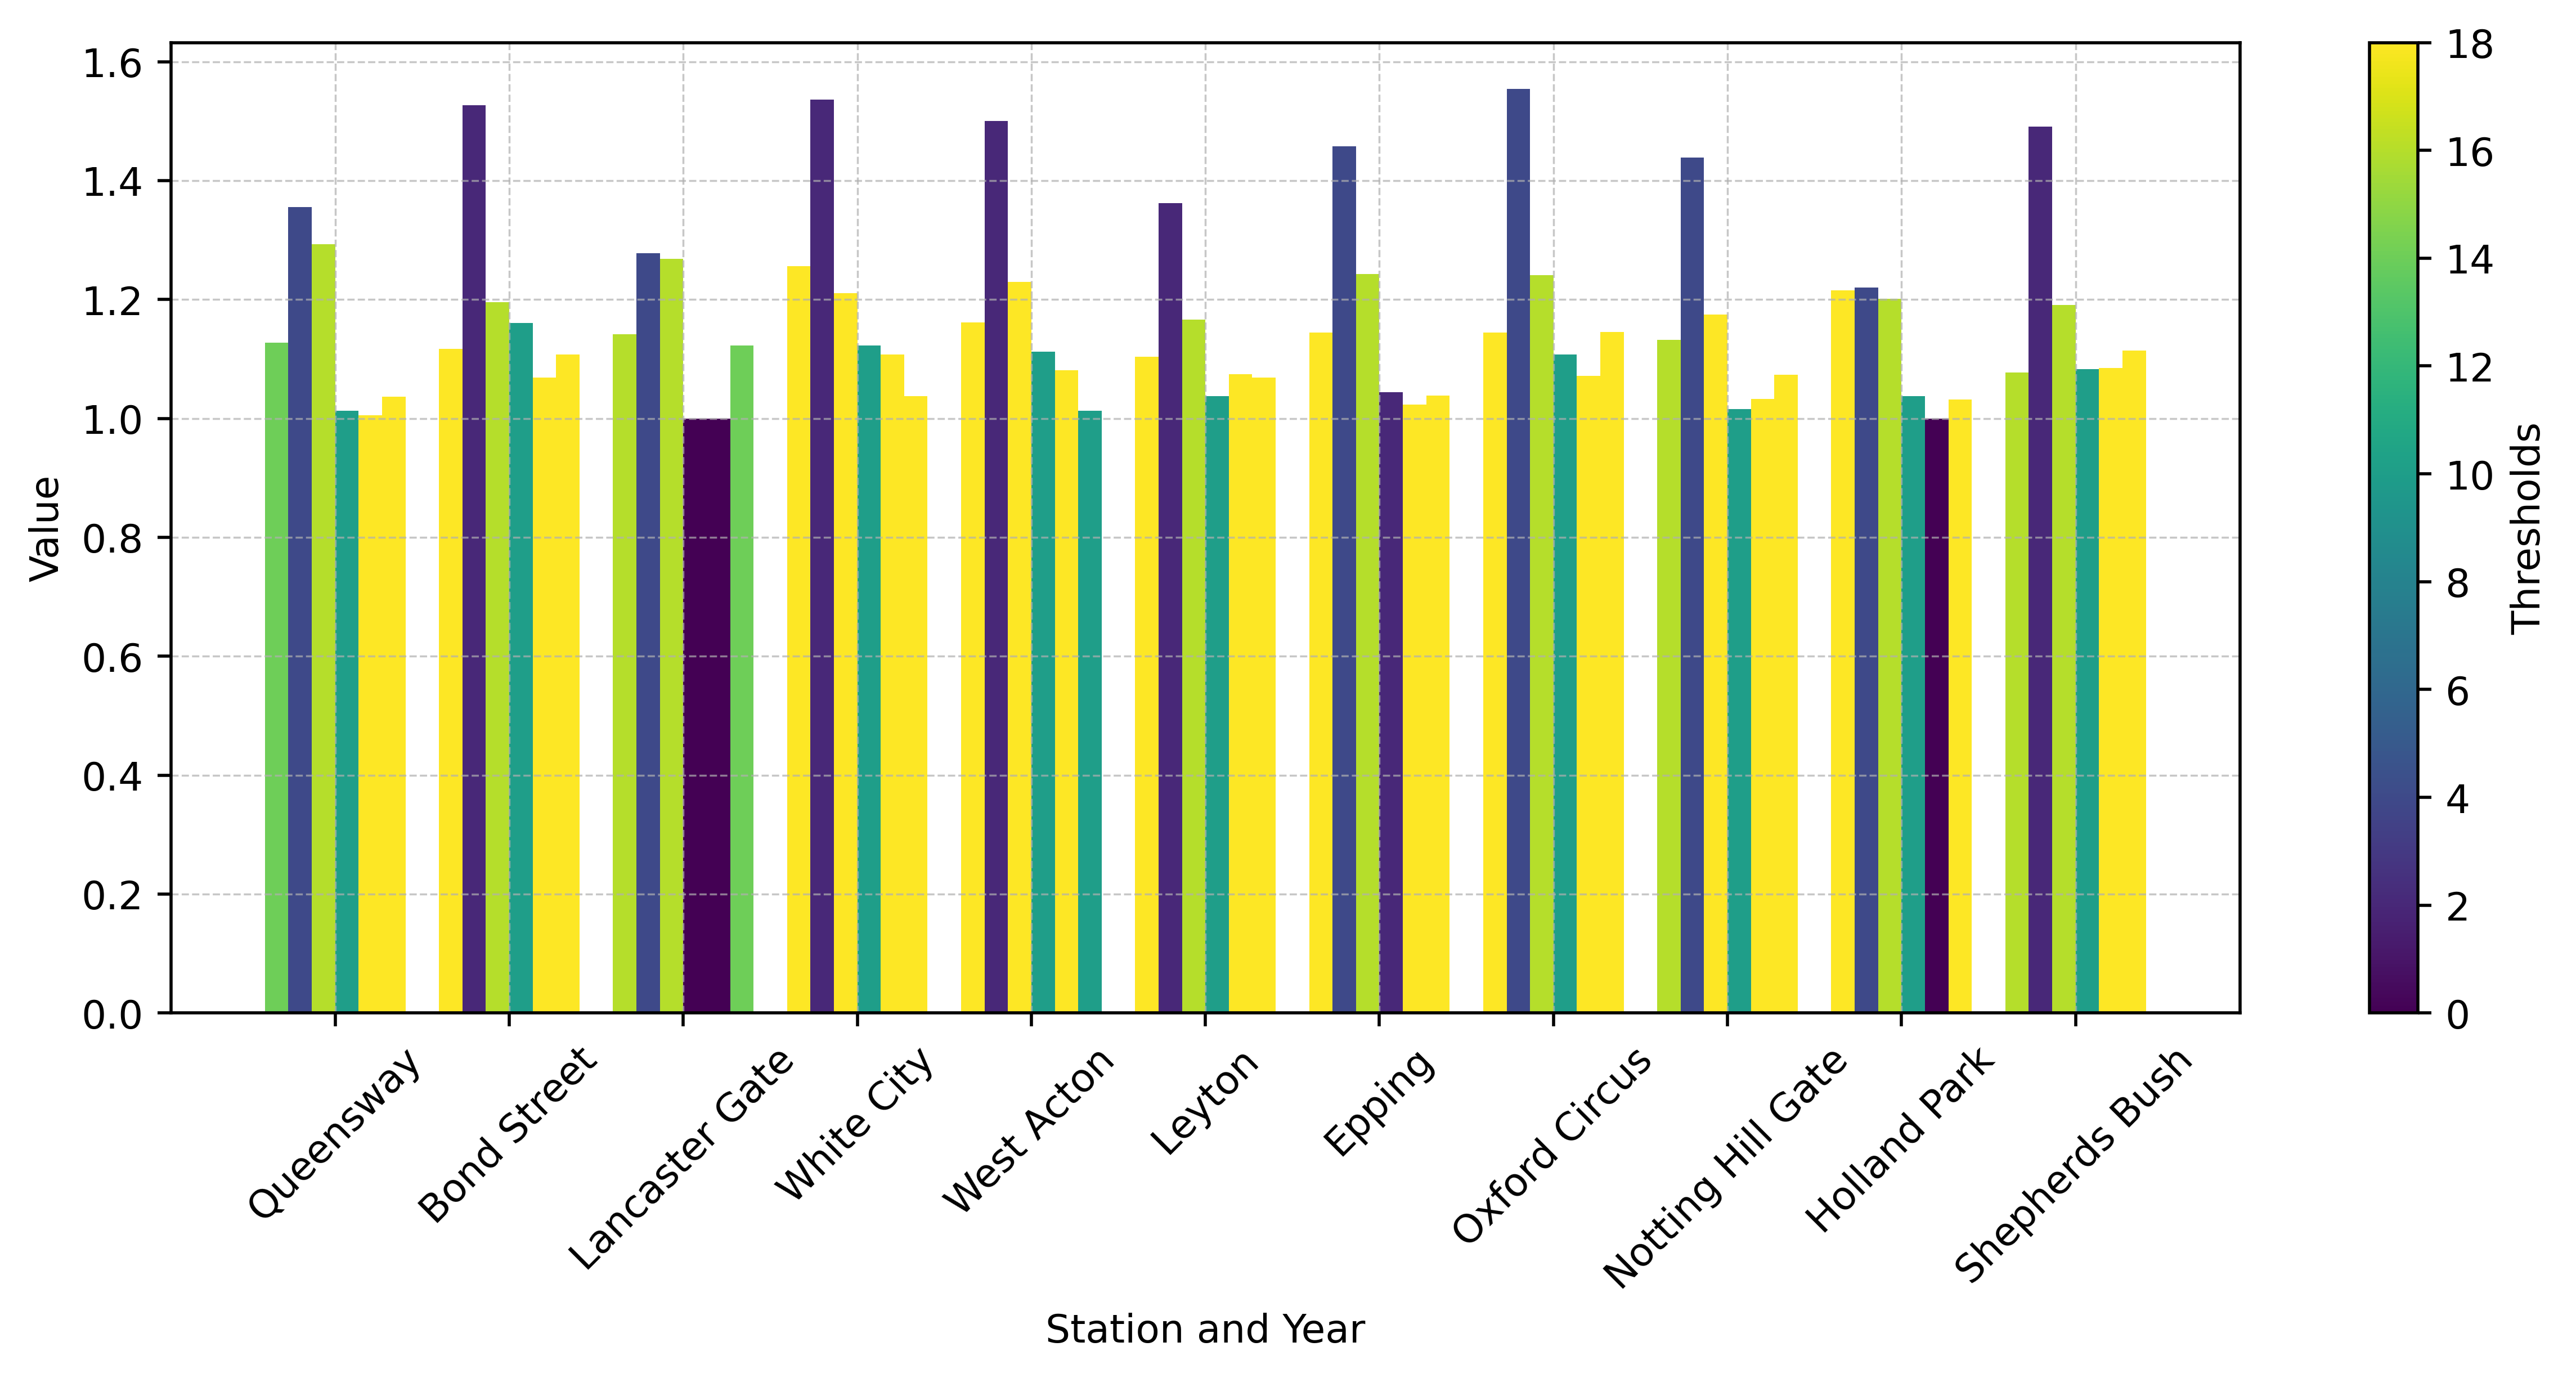

In [10]:
# get best thresholds evolution through the years
stations = ['Queensway', 'Bond Street', 'Lancaster Gate', 'White City', 'West Acton', 'Leyton', 'Epping', 'Oxford Circus', 'Notting Hill Gate', 'Holland Park', 'Shepherds Bush']
years = ['2019', '2020', '2021', '2022', '2023', '2024']
precision = 2
thresholds = [i for i in range(0, 20, precision)]
x_labels = []
x_positions = []
bar_width = 0.35  # width of each bar
station_spacing = 0.5  # spacing between stations
offset = 0  # offset for bar positions

thresholds_colors = {threshold: plt.cm.viridis(threshold / max(thresholds)) for threshold in thresholds}

plt.figure(figsize=(10, 5), dpi=500)
for station in stations:
    bars = []
    colors = []
    for year in years:
        start_date = f'01/01/{year}'
        end_date = f'31/12/{year}'
        entry_data, _ = wh2.station_best_thresholds(station, start_date, end_date, coefs=True, precision=precision)
        bars.append(entry_data[1])
        colors.append(thresholds_colors[entry_data[0]])
        x_labels.append(f'{station} {year}')
        x_positions.append(offset)
        offset += bar_width
    offset += station_spacing  # add spacing after each station's bars
    plt.bar(x_positions[-len(years):], bars, color=colors, width=bar_width)

plt.xlabel('Station and Year')
plt.ylabel('Value')
#plt.title('Best Thresholds Evolution')
plt.xticks(ticks=[(x_positions[i] + x_positions[i + len(years) - 1]) / 2 for i in range(0, len(x_positions), len(years))], 
           labels=stations, rotation=45)
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=min(thresholds), vmax=max(thresholds)))
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Thresholds')
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()

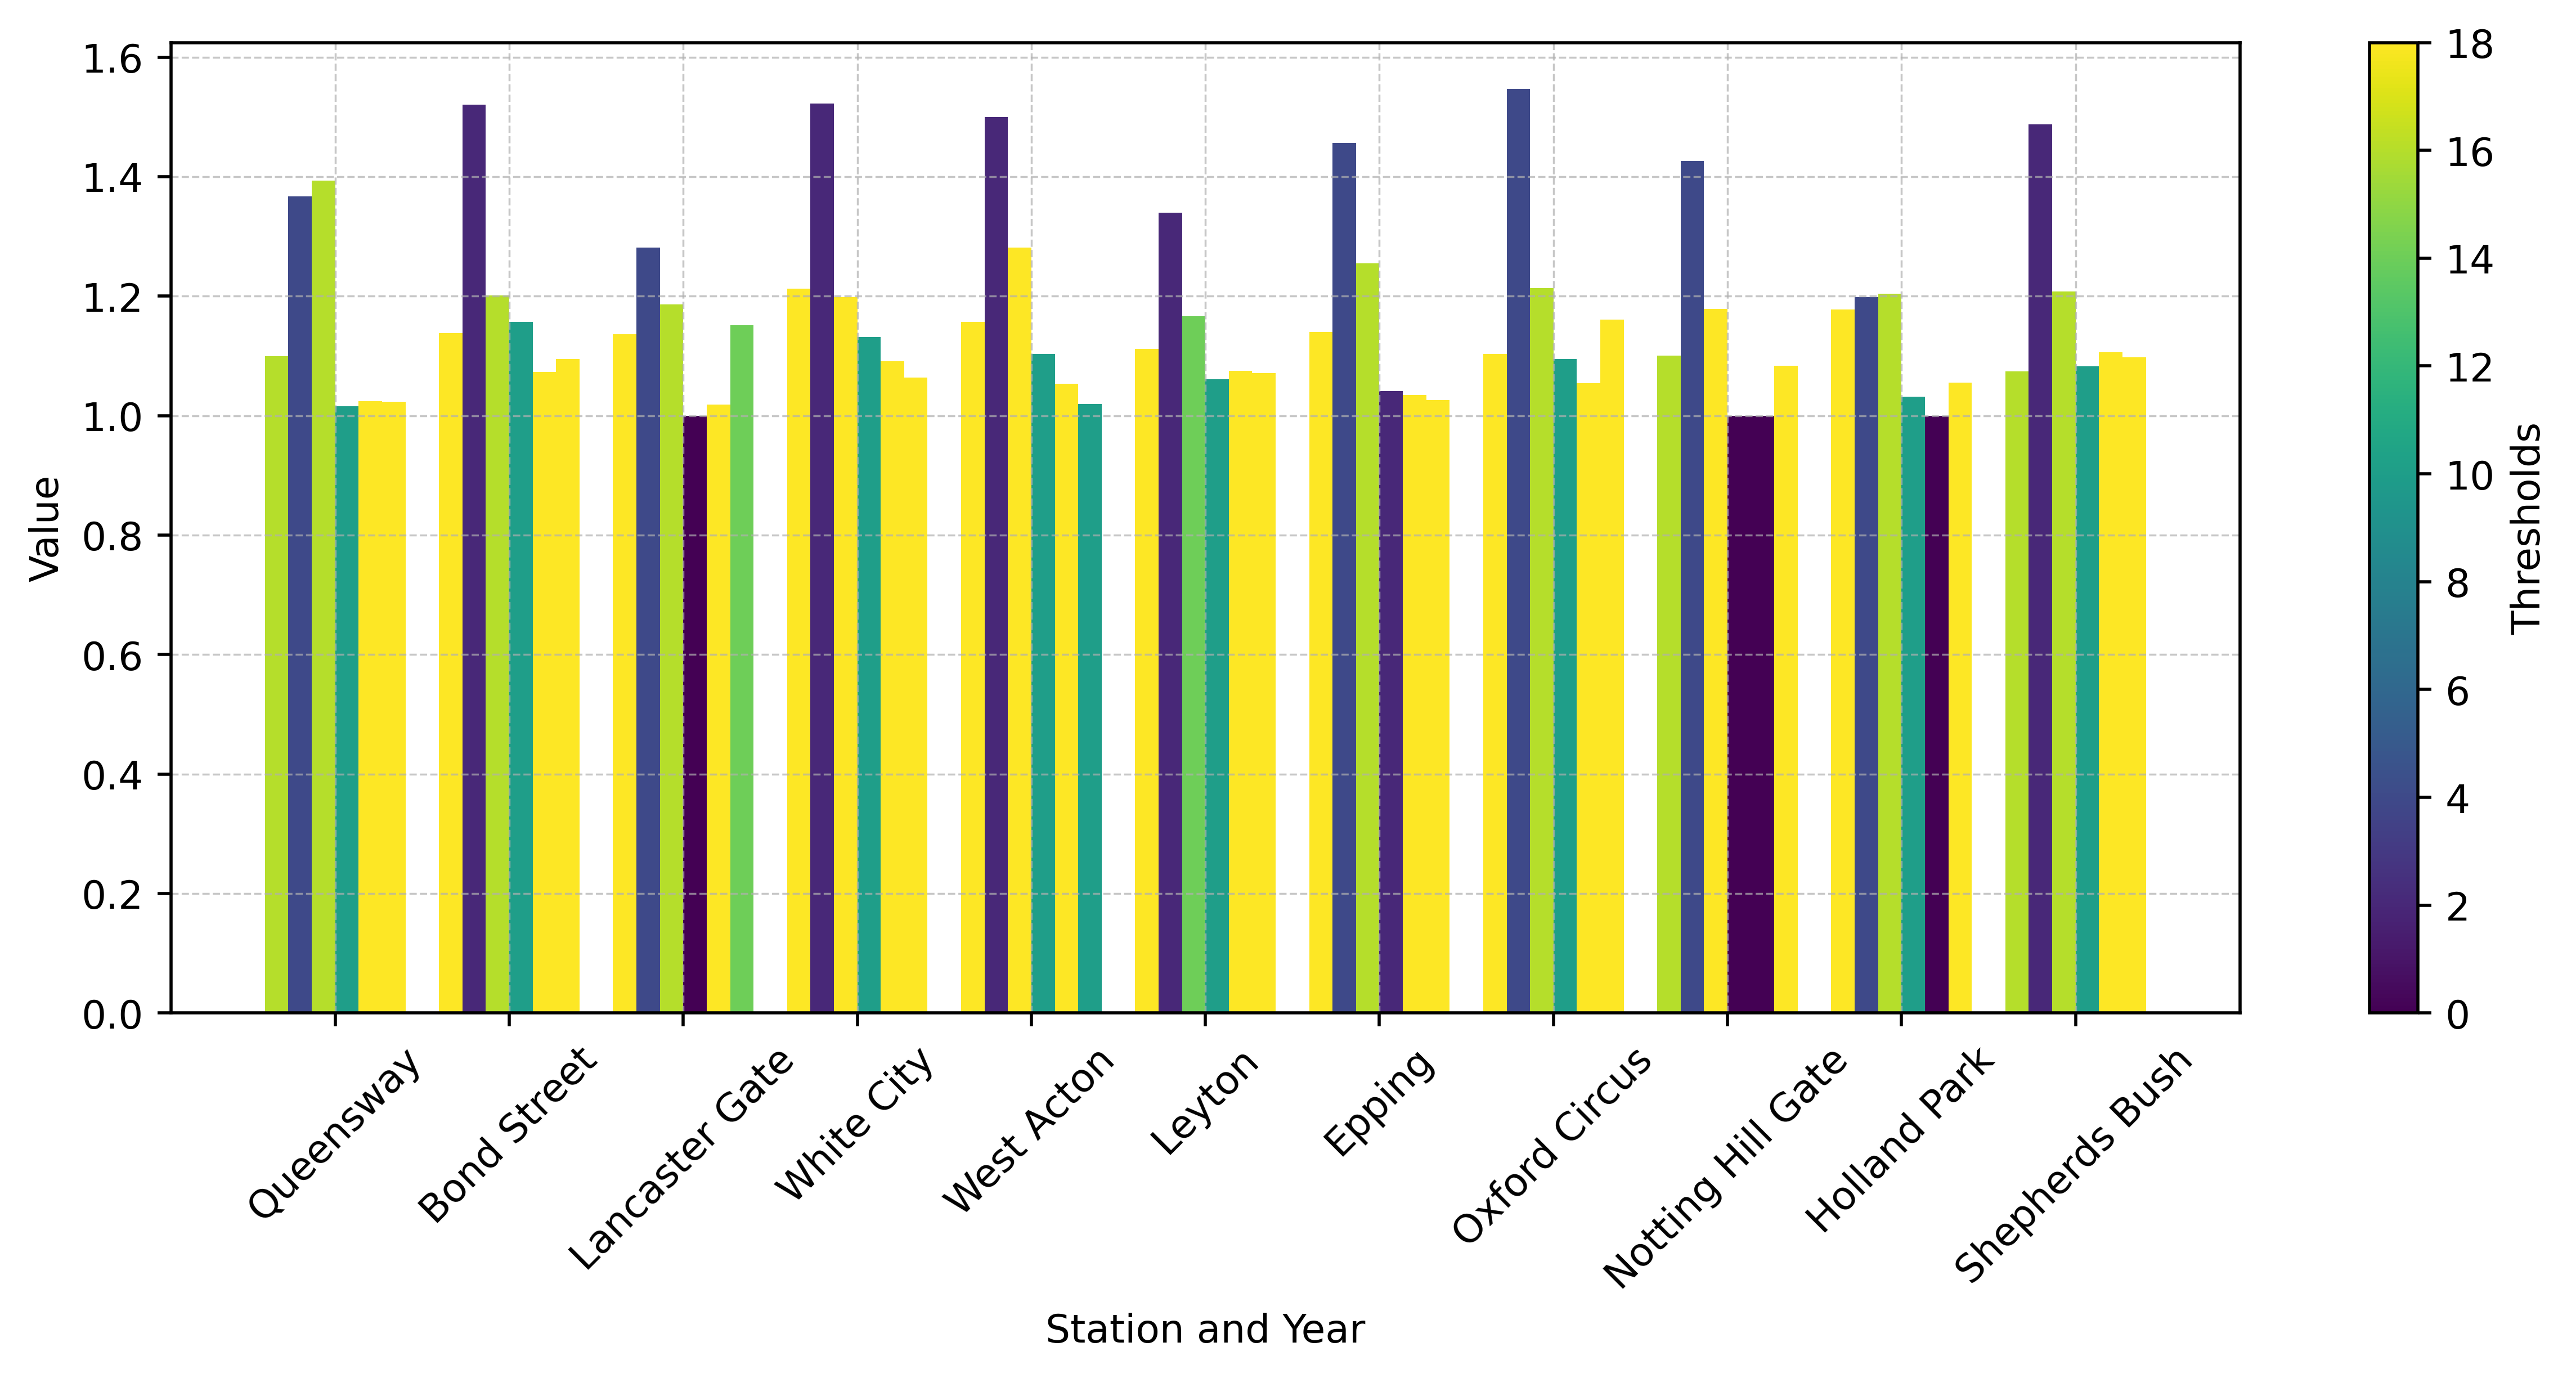

In [ ]:
# get best thresholds evolution through the years EXITS
stations = ['Queensway', 'Bond Street', 'Lancaster Gate', 'White City', 'West Acton', 'Leyton', 'Epping', 'Oxford Circus', 'Notting Hill Gate', 'Holland Park', 'Shepherds Bush']
years = ['2019','2020', '2021', '2022', '2023', '2024']
precision = 2
thresholds = [i for i in range(0, 20, precision)]
x_labels = []
x_positions = []
bar_width = 0.35  # width of each bar
station_spacing = 0.5  # spacing between stations
offset = 0  # offset for bar positions

thresholds_colors = {threshold: plt.cm.viridis(threshold / max(thresholds)) for threshold in thresholds}

plt.figure(figsize=(10, 5), dpi=500)
for station in stations:
    bars = []
    colors = []
    for year in years:
        start_date = f'01/01/{year}'
        end_date = f'31/12/{year}'
        _, exit_data = wh2.station_best_thresholds(station, start_date, end_date, coefs=True, precision=precision)
        bars.append(exit_data[1])
        colors.append(thresholds_colors[exit_data[0]])
        x_labels.append(f'{station} {year}')
        x_positions.append(offset)
        offset += bar_width
    offset += station_spacing  # add spacing after each station's bars
    plt.bar(x_positions[-len(years):], bars, color=colors, width=bar_width)

plt.xlabel('Station and Year')
plt.ylabel('Value')
#plt.title('Best Thresholds Evolution')
plt.xticks(ticks=[(x_positions[i] + x_positions[i + len(years) - 1]) / 2 for i in range(0, len(x_positions), len(years))], 
           labels=stations, rotation=45)
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=min(thresholds), vmax=max(thresholds)))
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Thresholds')
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()

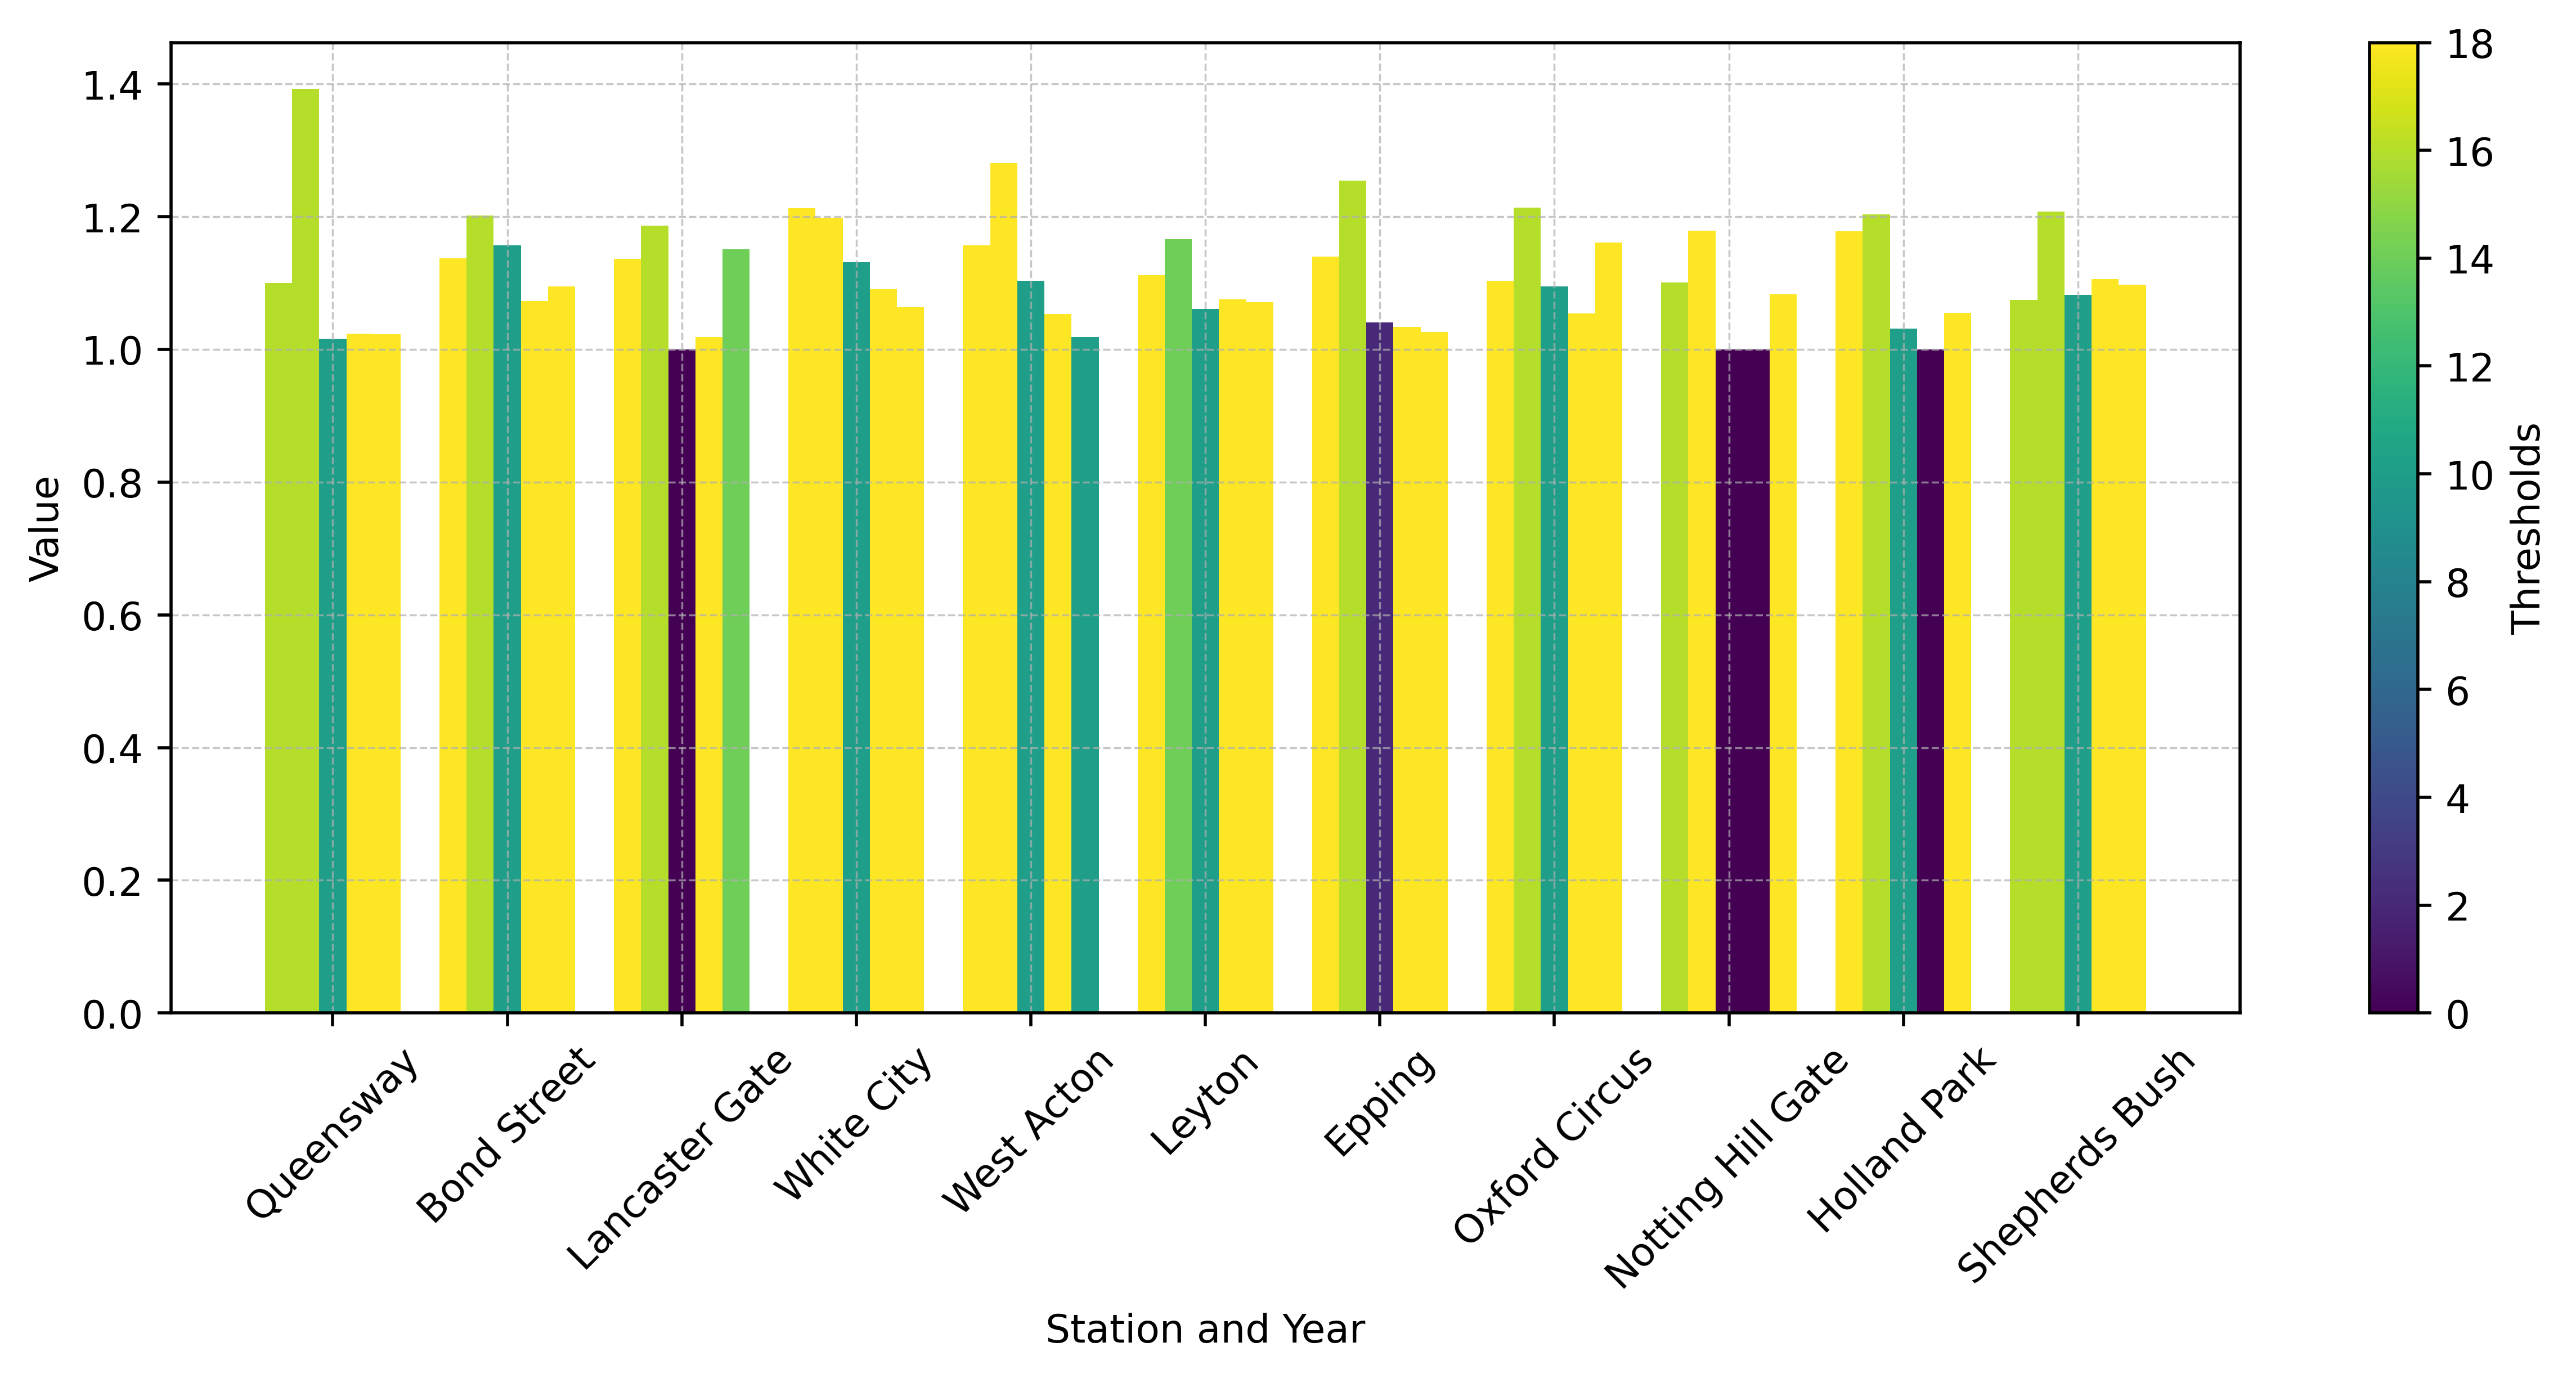

In [46]:
# get best thresholds evolution through the years EXITS
stations = ['Queensway', 'Bond Street', 'Lancaster Gate', 'White City', 'West Acton', 'Leyton', 'Epping', 'Oxford Circus', 'Notting Hill Gate', 'Holland Park', 'Shepherds Bush']
years = ['2019', '2021', '2022', '2023', '2024']
precision = 2
thresholds = [i for i in range(0, 20, precision)]
x_labels = []
x_positions = []
bar_width = 0.35  # width of each bar
station_spacing = 0.5  # spacing between stations
offset = 0  # offset for bar positions

thresholds_colors = {threshold: plt.cm.viridis(threshold / max(thresholds)) for threshold in thresholds}

plt.figure(figsize=(10, 5), dpi=500)
for station in stations:
    bars = []
    colors = []
    for year in years:
        start_date = f'01/01/{year}'
        end_date = f'31/12/{year}'
        _, exit_data = wh2.station_best_thresholds(station, start_date, end_date, coefs=True, precision=precision)
        bars.append(exit_data[1])
        colors.append(thresholds_colors[exit_data[0]])
        x_labels.append(f'{station} {year}')
        x_positions.append(offset)
        offset += bar_width
    offset += station_spacing  # add spacing after each station's bars
    plt.bar(x_positions[-len(years):], bars, color=colors, width=bar_width)

plt.xlabel('Station and Year')
plt.ylabel('Value')
#plt.title('Best Thresholds Evolution')
plt.xticks(ticks=[(x_positions[i] + x_positions[i + len(years) - 1]) / 2 for i in range(0, len(x_positions), len(years))], 
           labels=stations, rotation=45)
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=min(thresholds), vmax=max(thresholds)))
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Thresholds')
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()

Best entry threshold: 4 mm, std: 0.029053081944515557
Best exit threshold: 4 mm, std: 0.018841683395501064
Best entry threshold: 6 mm, std: 0.039590303509945385
Best exit threshold: 6 mm, std: 0.04165150252886607
Best entry threshold: 4 mm, std: 0.04735637443599164
Best exit threshold: 8 mm, std: 0.04294377401877082
Best entry threshold: 6 mm, std: 0.031995336181185864
Best exit threshold: 6 mm, std: 0.031063014750709564


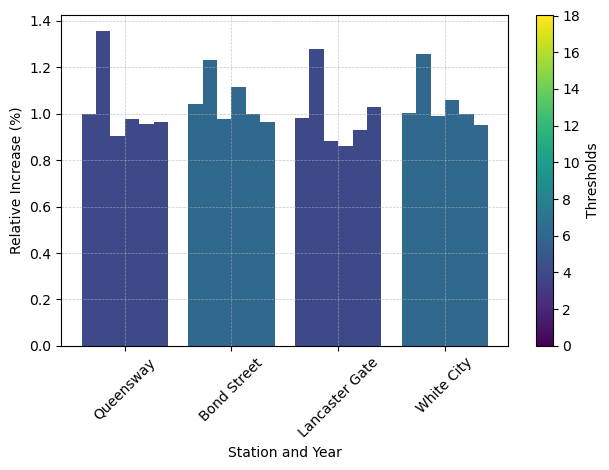

In [ ]:
wh2 = WeatherHandler()
type = 'entries'
stations = ['Queensway', 'Bond Street', 'Lancaster Gate', 'White City']
years = ['2019', '2021', '2022', '2023', '2024']
precision = 2
thresholds = [i for i in range(0, 20, precision)]
x_labels = []
x_positions = []
bar_width = 0.35  # width of each bar
station_spacing = 0.5  # spacing between stations
offset = 0  # offset for bar positions

thresholds_colors = {threshold: plt.cm.viridis(threshold / max(thresholds)) for threshold in thresholds}
for station in stations:
    b_ent, b_ext, _, _ = wh2.find_steadiest_thresholh(station, precision=precision)
    threshold = b_ent if type == 'entries' else b_ext
    bars = []
    colors = []
    for year in years:
        start_date = f'01/01/{year}'
        end_date = f'31/12/{year}'
        ent, ext = wh2.station_weather_influence(station, start_date, end_date, threshold=threshold)
        coef = ent['rainy']/ent['dry'] if type == 'entries' else ext['rainy']/ext['dry']
        bars.append(coef)
        colors.append(thresholds_colors[threshold])
        x_labels.append(f'{station} {year}')
        x_positions.append(offset)
        offset += bar_width
    offset += station_spacing  # add spacing after each station's bars
    plt.bar(x_positions[-len(years):], bars, color=colors, width=bar_width)
plt.xlabel('Station and Year')
plt.ylabel('Relative Increase (%)')
#plt.title('Best Thresholds Evolution') 
plt.xticks(ticks=[(x_positions[i] + x_positions[i + len(years) - 1]) / 2 for i in range(0, len(x_positions), len(years))], 
           labels=stations, rotation=45)
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=min(thresholds), vmax=max(thresholds)))
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Thresholds')
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.savefig(f'plots/thresholds_influence_{type}_{years[0]}_{years[-1]}.png')
plt.show()
        


Best entry threshold: 4 mm, std: 0.029053081944515557
Best exit threshold: 4 mm, std: 0.018841683395501064
Best entry threshold: 6 mm, std: 0.039590303509945385
Best exit threshold: 6 mm, std: 0.04165150252886607
Best entry threshold: 4 mm, std: 0.04735637443599164
Best exit threshold: 8 mm, std: 0.04294377401877082
Best entry threshold: 6 mm, std: 0.031995336181185864
Best exit threshold: 6 mm, std: 0.031063014750709564
Best entry threshold: 6 mm, std: 0.02020190090512926
Best exit threshold: 6 mm, std: 0.013069612116948362
Best entry threshold: 8 mm, std: 0.014269190084539913
Best exit threshold: 8 mm, std: 0.01393211754781886
Best entry threshold: 6 mm, std: 0.024268224618430378
Best exit threshold: 8 mm, std: 0.014163677744894338
Best entry threshold: 6 mm, std: 0.023762725451129812
Best exit threshold: 6 mm, std: 0.02931094949625426
Best entry threshold: 12 mm, std: 0.02882046846918345
Best exit threshold: 12 mm, std: 0.022205661555101033
Best entry threshold: 8 mm, std: 0.0152045

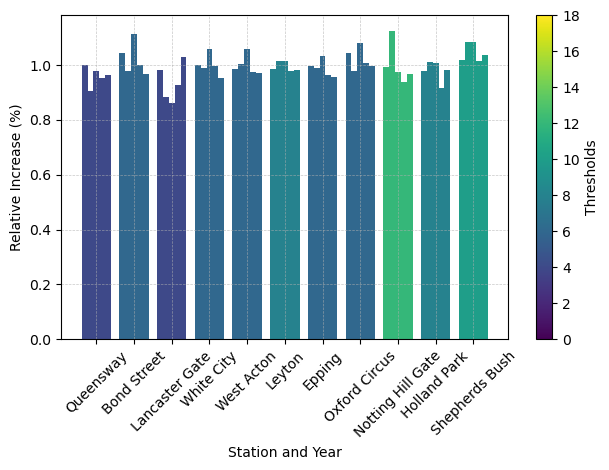

In [3]:
wh2 = WeatherHandler()
type = 'entries'
stations = ['Queensway', 'Bond Street', 'Lancaster Gate', 'White City', 'West Acton', 'Leyton', 'Epping', 'Oxford Circus', 'Notting Hill Gate', 'Holland Park', 'Shepherds Bush']
years = ['2019', '2021', '2022', '2023', '2024']
precision = 2
thresholds = [i for i in range(0, 20, precision)]
x_labels = []
x_positions = []
bar_width = 0.35  # width of each bar
station_spacing = 0.5  # spacing between stations
offset = 0  # offset for bar positions

thresholds_colors = {threshold: plt.cm.viridis(threshold / max(thresholds)) for threshold in thresholds}
for station in stations:
    b_ent, b_ext, _, _ = wh2.find_steadiest_thresholh(station, precision=precision)
    threshold = b_ent if type == 'entries' else b_ext
    bars = []
    colors = []
    for year in years:
        start_date = f'01/01/{year}'
        end_date = f'31/12/{year}'
        ent, ext = wh2.station_weather_influence(station, start_date, end_date, threshold=threshold)
        coef = ent['rainy']/ent['dry'] if type == 'entries' else ext['rainy']/ext['dry']
        bars.append(coef)
        colors.append(thresholds_colors[threshold])
        x_labels.append(f'{station} {year}')
        x_positions.append(offset)
        offset += bar_width
    offset += station_spacing  # add spacing after each station's bars
    plt.bar(x_positions[-len(years):], bars, color=colors, width=bar_width)
plt.xlabel('Station and Year')
plt.ylabel('Relative Increase (%)')
#plt.title('Best Thresholds Evolution') 
plt.xticks(ticks=[(x_positions[i] + x_positions[i + len(years) - 1]) / 2 for i in range(0, len(x_positions), len(years))], 
           labels=stations, rotation=45)
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=min(thresholds), vmax=max(thresholds)))
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Thresholds')
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.savefig(f'plots/thresholds_influence_{type}_{years[0]}_{years[-1]}.png')
plt.show()
        


Best entry threshold: 4 mm, std: 0.029053081944515557
Best exit threshold: 4 mm, std: 0.018841683395501064
Best entry threshold: 6 mm, std: 0.039590303509945385
Best exit threshold: 6 mm, std: 0.04165150252886607
Best entry threshold: 4 mm, std: 0.04735637443599164
Best exit threshold: 8 mm, std: 0.04294377401877082
Best entry threshold: 6 mm, std: 0.031995336181185864
Best exit threshold: 6 mm, std: 0.031063014750709564
Best entry threshold: 6 mm, std: 0.02020190090512926
Best exit threshold: 6 mm, std: 0.013069612116948362
Best entry threshold: 8 mm, std: 0.014269190084539913
Best exit threshold: 8 mm, std: 0.01393211754781886
Best entry threshold: 6 mm, std: 0.024268224618430378
Best exit threshold: 8 mm, std: 0.014163677744894338
Best entry threshold: 6 mm, std: 0.023762725451129812
Best exit threshold: 6 mm, std: 0.02931094949625426
Best entry threshold: 12 mm, std: 0.02882046846918345
Best exit threshold: 12 mm, std: 0.022205661555101033
Best entry threshold: 8 mm, std: 0.0152045

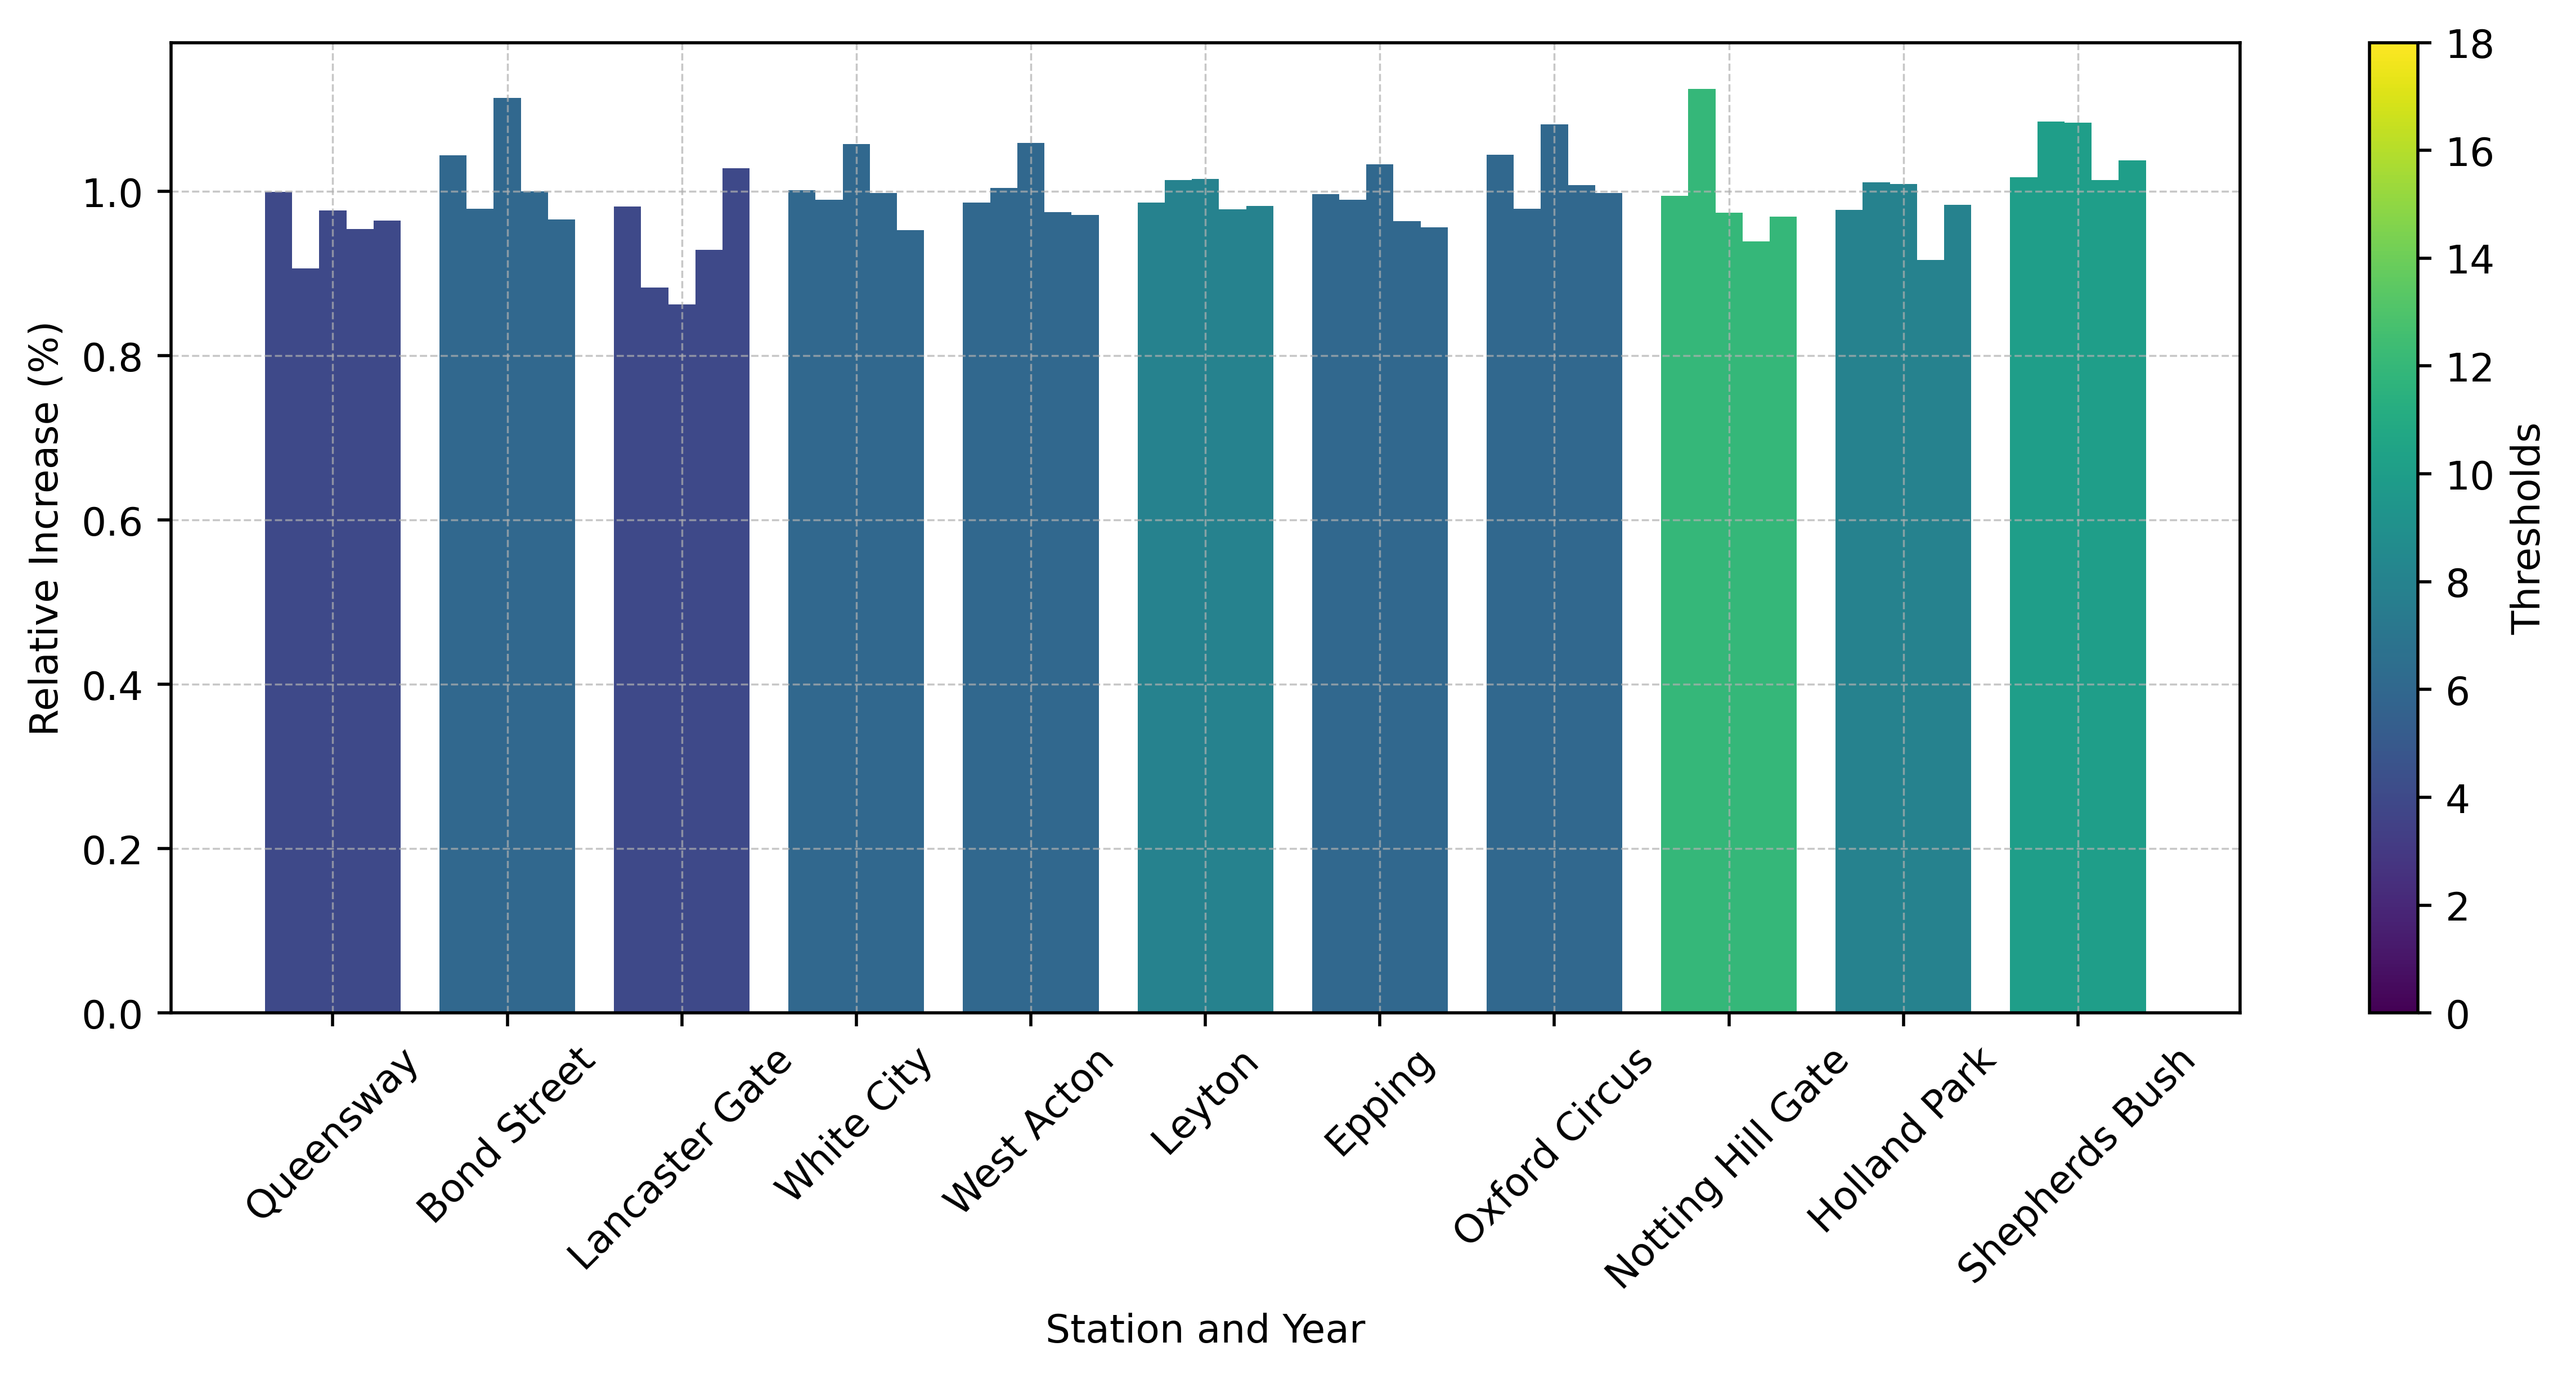

In [5]:
wh2 = WeatherHandler()
type = 'entries'
stations = ['Queensway', 'Bond Street', 'Lancaster Gate', 'White City', 'West Acton', 'Leyton', 'Epping', 'Oxford Circus', 'Notting Hill Gate', 'Holland Park', 'Shepherds Bush']
years = ['2019', '2021', '2022', '2023', '2024']
precision = 2
thresholds = [i for i in range(0, 20, precision)]
x_labels = []
x_positions = []
bar_width = 0.35  # width of each bar
station_spacing = 0.5  # spacing between stations
offset = 0  # offset for bar positions
plt.figure(figsize=(10, 5), dpi=500)
thresholds_colors = {threshold: plt.cm.viridis(threshold / max(thresholds)) for threshold in thresholds}
for station in stations:
    b_ent, b_ext, _, _ = wh2.find_steadiest_thresholh(station, precision=precision)
    threshold = b_ent if type == 'entries' else b_ext
    bars = []
    colors = []
    for year in years:
        start_date = f'01/01/{year}'
        end_date = f'31/12/{year}'
        ent, ext = wh2.station_weather_influence(station, start_date, end_date, threshold=threshold)
        coef = ent['rainy']/ent['dry'] if type == 'entries' else ext['rainy']/ext['dry']
        bars.append(coef)
        colors.append(thresholds_colors[threshold])
        x_labels.append(f'{station} {year}')
        x_positions.append(offset)
        offset += bar_width
    offset += station_spacing  # add spacing after each station's bars
    plt.bar(x_positions[-len(years):], bars, color=colors, width=bar_width)
plt.xlabel('Station and Year')
plt.ylabel('Relative Increase (%)')
#plt.title('Best Thresholds Evolution') 
plt.xticks(ticks=[(x_positions[i] + x_positions[i + len(years) - 1]) / 2 for i in range(0, len(x_positions), len(years))], 
           labels=stations, rotation=45)
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=min(thresholds), vmax=max(thresholds)))
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Thresholds')
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.savefig(f'plots/thresholds_influence_{type}_{years[0]}_{years[-1]}.png')
plt.show()
        


In [2]:
pr = FootballData()
r = pr.get_all_match_influence('01/01/2019', '31/10/2024')

In [3]:
print(r)

                distance  entries_diff  exits_diff  match_days  non_match_days
Leyton Orient      0.668     10.786404   10.926666       117.0          2014.0
West Ham           0.942     14.281723   15.638014       109.0          2022.0
Brentford          2.867    -10.458552  -10.151663       119.0          2012.0
Fulham             3.331      5.511520    6.820787       116.0          2015.0
Chelsea            3.921    -20.361480  -18.635042       109.0          2022.0
Arsenal            4.068    -50.632013  -52.679479       109.0          2022.0
Millwall           4.090    -32.610163  -33.811042       108.0          2023.0
Tottenham          6.537    -16.949707  -16.467028       109.0          2022.0
Barnet             7.252      0.000000    0.000000         0.0          2131.0
AFC Wimbledon      8.391     13.583694   14.529805       125.0          2006.0
Crystal Palace    12.789    -40.753006  -40.044627       109.0          2022.0
Bromley           15.461   -100.000000 -100.000000  

In [3]:
r2 = []
years = ['2019', '2020', '2021', '2022', '2023', '2024']
pr = FootballData()
for year in years:
    print(f'Processing {year}')
    start_date = f'01/01/{year}'
    end_date = f'31/12/{year}'
    r2.append(pr.get_all_match_influence(start_date, end_date))
    print(f'Finished {year}')

Processing 2019
Finished 2019
Processing 2020
Finished 2020
Processing 2021
Finished 2021
Processing 2022
Finished 2022
Processing 2023
Finished 2023
Processing 2024
Finished 2024


In [42]:

for i, df in enumerate(r2):
    df['team'] = df.index
    df['year'] = years[i]
    df['closest_station'] = df['team'].apply(lambda x : pr.get_closest_station(team=x)[0])
total_df = pd.concat(r2, ignore_index=True)

In [25]:
print(len(total_df))

NameError: name 'total_df' is not defined

In [53]:
print(total_df[(total_df['distance'] < 1)][['team','closest_station', 'distance', "entries_coef", "exits_coefs", "year", 'match_days']])

             team closest_station  distance  entries_coef  exits_coefs  year  \
0   Leyton Orient          Leyton     0.668      1.012404     1.009241  2019   
1        West Ham       Stratford     0.942      1.195587     1.209891  2019   
12  Leyton Orient          Leyton     0.668      1.509747     1.495157  2020   
13       West Ham       Stratford     0.942      1.301908     1.312437  2020   
24  Leyton Orient          Leyton     0.668      0.961317     0.949839  2021   
25       West Ham       Stratford     0.942      1.004376     0.992325  2021   
36  Leyton Orient          Leyton     0.668      1.180562     1.165008  2022   
37       West Ham       Stratford     0.942      1.113181     1.141133  2022   
48  Leyton Orient          Leyton     0.668      1.147787     1.140827  2023   
49       West Ham       Stratford     0.942      1.138673     1.155680  2023   
60  Leyton Orient          Leyton     0.668      1.229878     1.241385  2024   
61       West Ham       Stratford     0.

In [52]:
print(total_df[['team','closest_station', 'distance', 'entries_coef', 'exits_coefs']].groupby(['team', 'closest_station', 'distance']).mean().reset_index().sort_values(by='distance', ascending=True))




              team  closest_station  distance  entries_coef  exits_coefs
8    Leyton Orient           Leyton     0.668      1.173616     1.166910
11        West Ham        Stratford     0.942      1.141838     1.155829
3        Brentford  Ealing Broadway     2.867      0.922308     0.926118
7           Fulham   Shepherds Bush     3.331      1.090487     1.101080
5          Chelsea     Holland Park     3.921      0.816400     0.830338
1          Arsenal    Chancery Lane     4.068      0.479462     0.457407
9         Millwall             Bank     4.090      0.630256     0.623853
10       Tottenham      Leytonstone     6.537      0.841440     0.845554
2           Barnet        Greenford     7.252      1.000000     1.000000
0    AFC Wimbledon   Shepherds Bush     8.391      1.183638     1.196679
6   Crystal Palace             Bank    12.789      0.648807     0.659860
4          Bromley         Mile End    15.461      0.833333     0.833333


In [37]:
print(pr.get_closest_station(team = 'Chelsea'))

('Holland Park', 3.921)


In [65]:
print(total_df[(total_df['closest_station'] == 'Leyton') & (total_df['year'] == '2021')]['entries_coef'])

24    0.961317
Name: entries_coef, dtype: float64


1.1669096936265628
1.1558291106653187


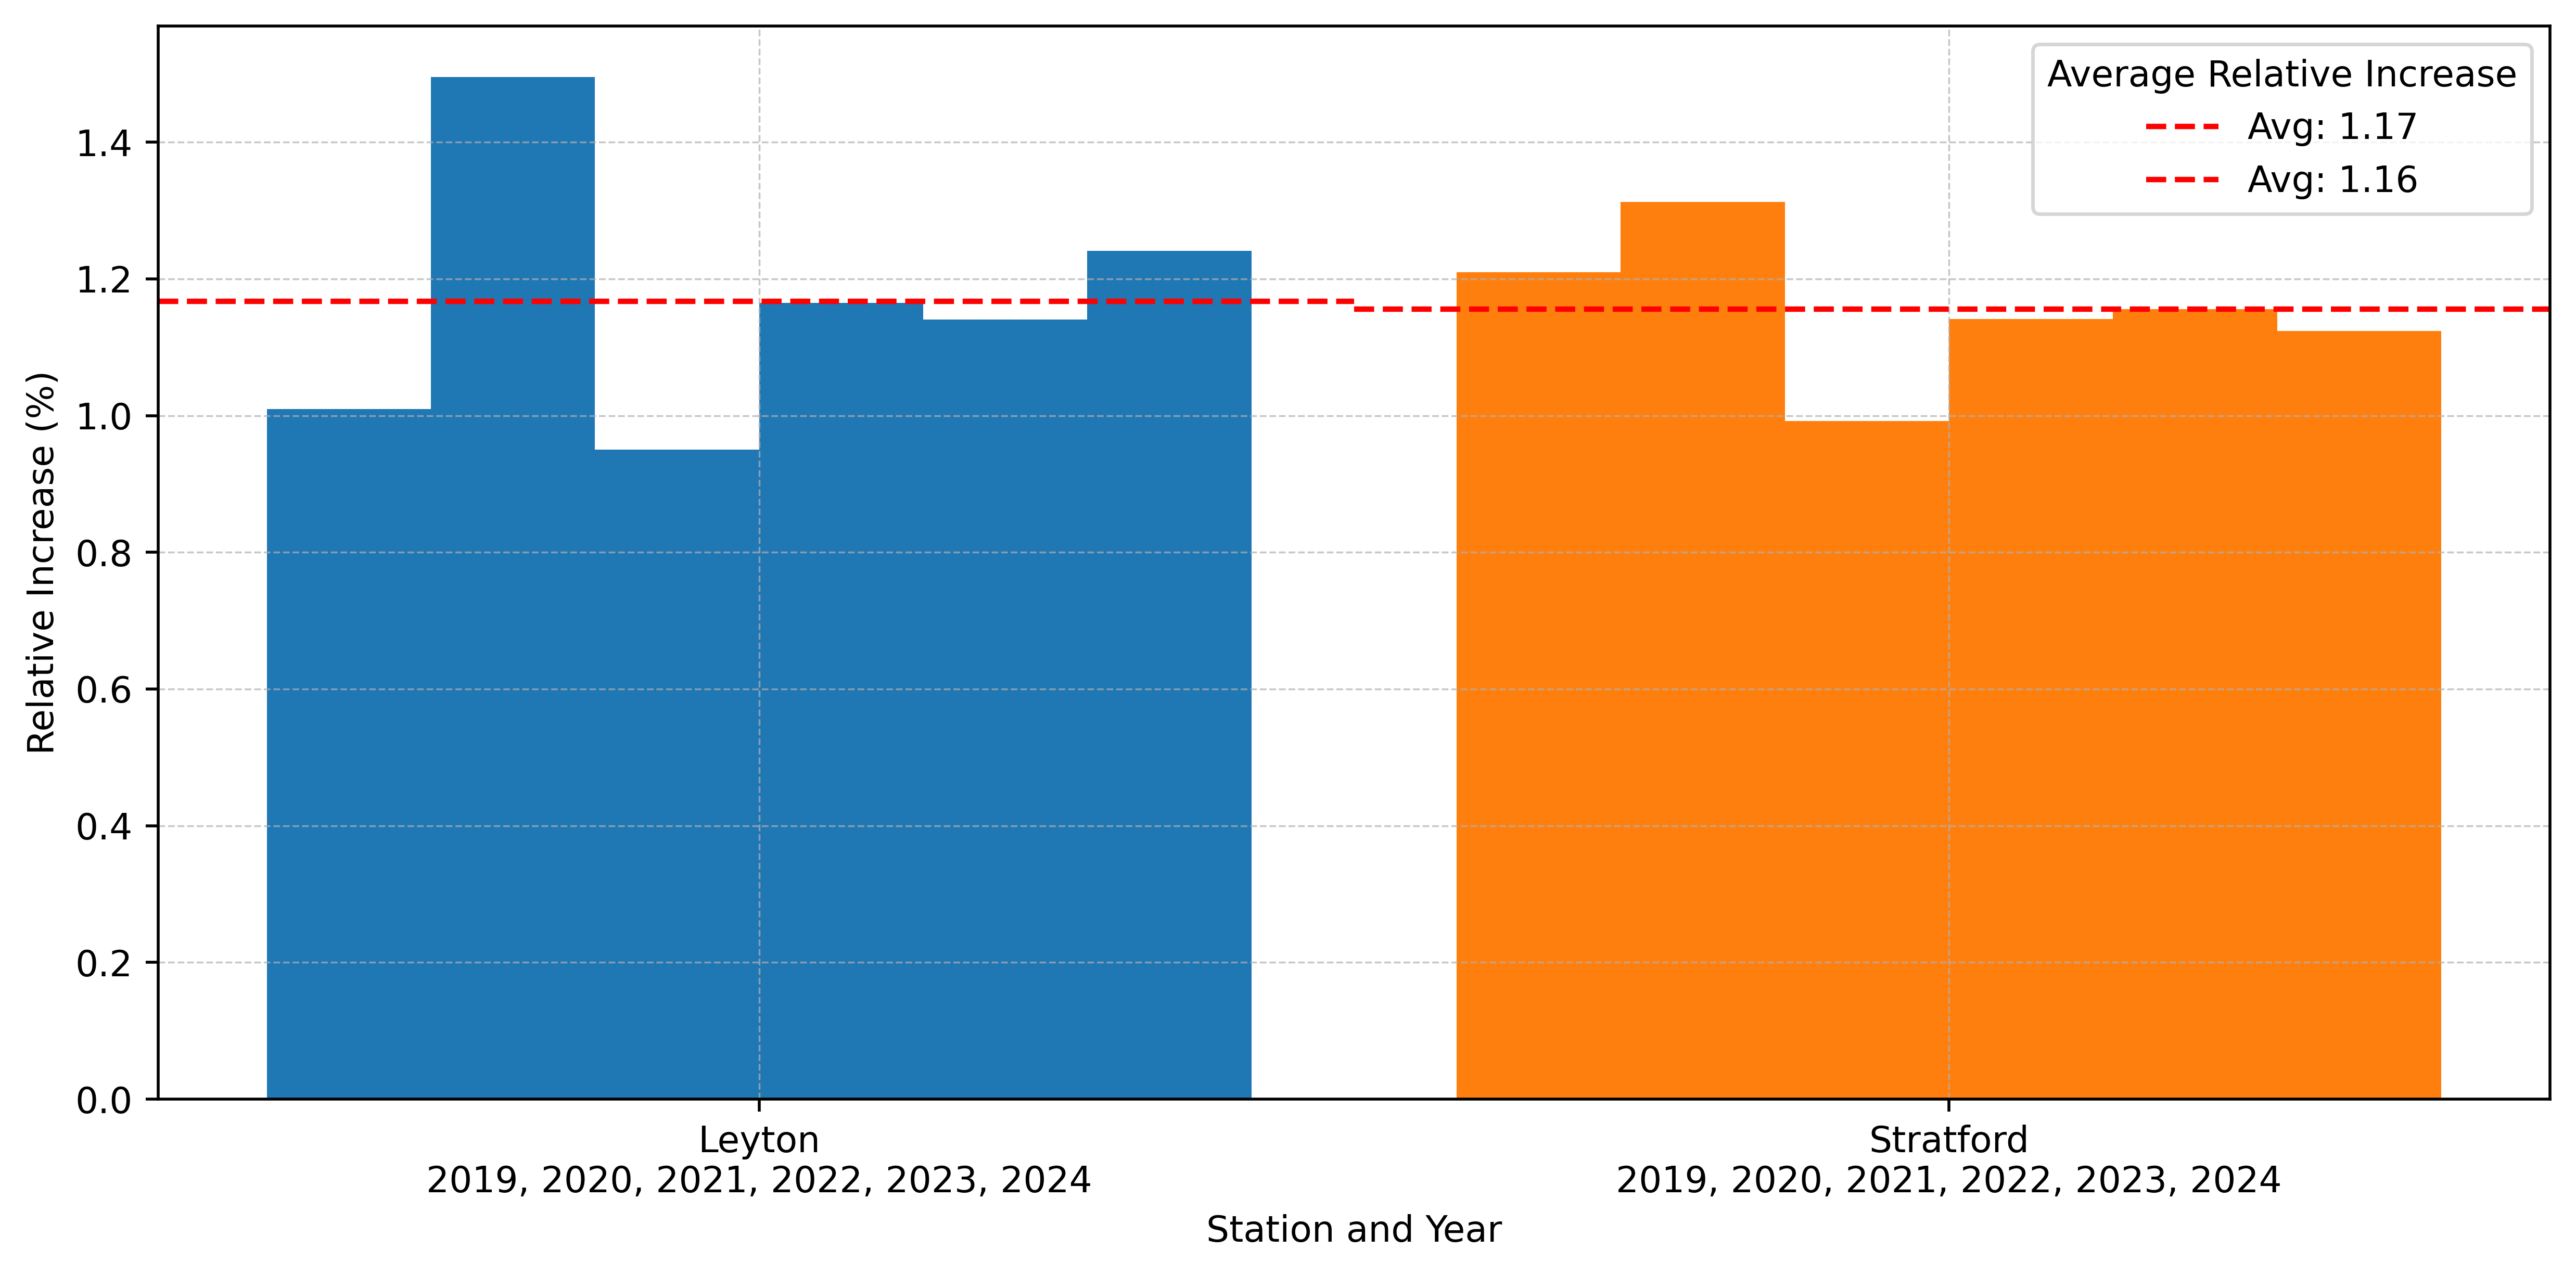

In [ ]:
plt.figure(figsize=(10, 5), dpi=500)
stations = total_df[total_df['distance'] < 1]['closest_station'].unique()
years = total_df['year'].unique()
x_labels = []
x_positions = []
bar_width = 0.4  # width of each bar
station_spacing = 0.5  # spacing between stations
offset = 0  # offset for bar positions

for i, station in enumerate(stations):
    bars = []
    avg = 0
    for year in years:
        coef = total_df[(total_df['closest_station'] == station) & (total_df['year'] == year)]['exits_coefs'].iloc[0]
        avg += coef
        bars.append(coef)
        x_labels.append(f'{station} {year}')
        x_positions.append(offset)
        offset += bar_width
    offset += station_spacing  # add spacing after each station's bars
    avg /= len(years)
    print(avg)
    plt.axhline(y=avg, color='red', linestyle='--', xmin=i*station_spacing, xmax = (i+1)*station_spacing, label=f'Avg: {avg:.2f}')
    plt.bar(x_positions[-len(years):], bars, width=bar_width)



# Add x-labels under the x-axis for each station and year
plt.xlabel('Station and Year')
plt.ylabel('Relative Increase (%)')
plt.xticks(
    ticks=[(x_positions[i] + x_positions[i + len(years) - 1]) / 2 for i in range(0, len(x_positions), len(years))],
    labels=[f'{station}\n{", ".join(years)}' for station in stations],
    rotation=0  # Keep years horizontal
)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.legend(title='Average Relative Increase', loc='upper right')
#plt.savefig(f'plots/match_influence_exits_{years[0]}_{years[-1]}.png')
plt.show()


In [1]:
from tools import *
from scraper import *
from data import *
from model import *
from events import *
import pandas as pd
import time
import matplotlib.pyplot as plt


import numpy as np
import datetime as dt

Mean: 4.9021739130434785, Std: 76.85192704757816


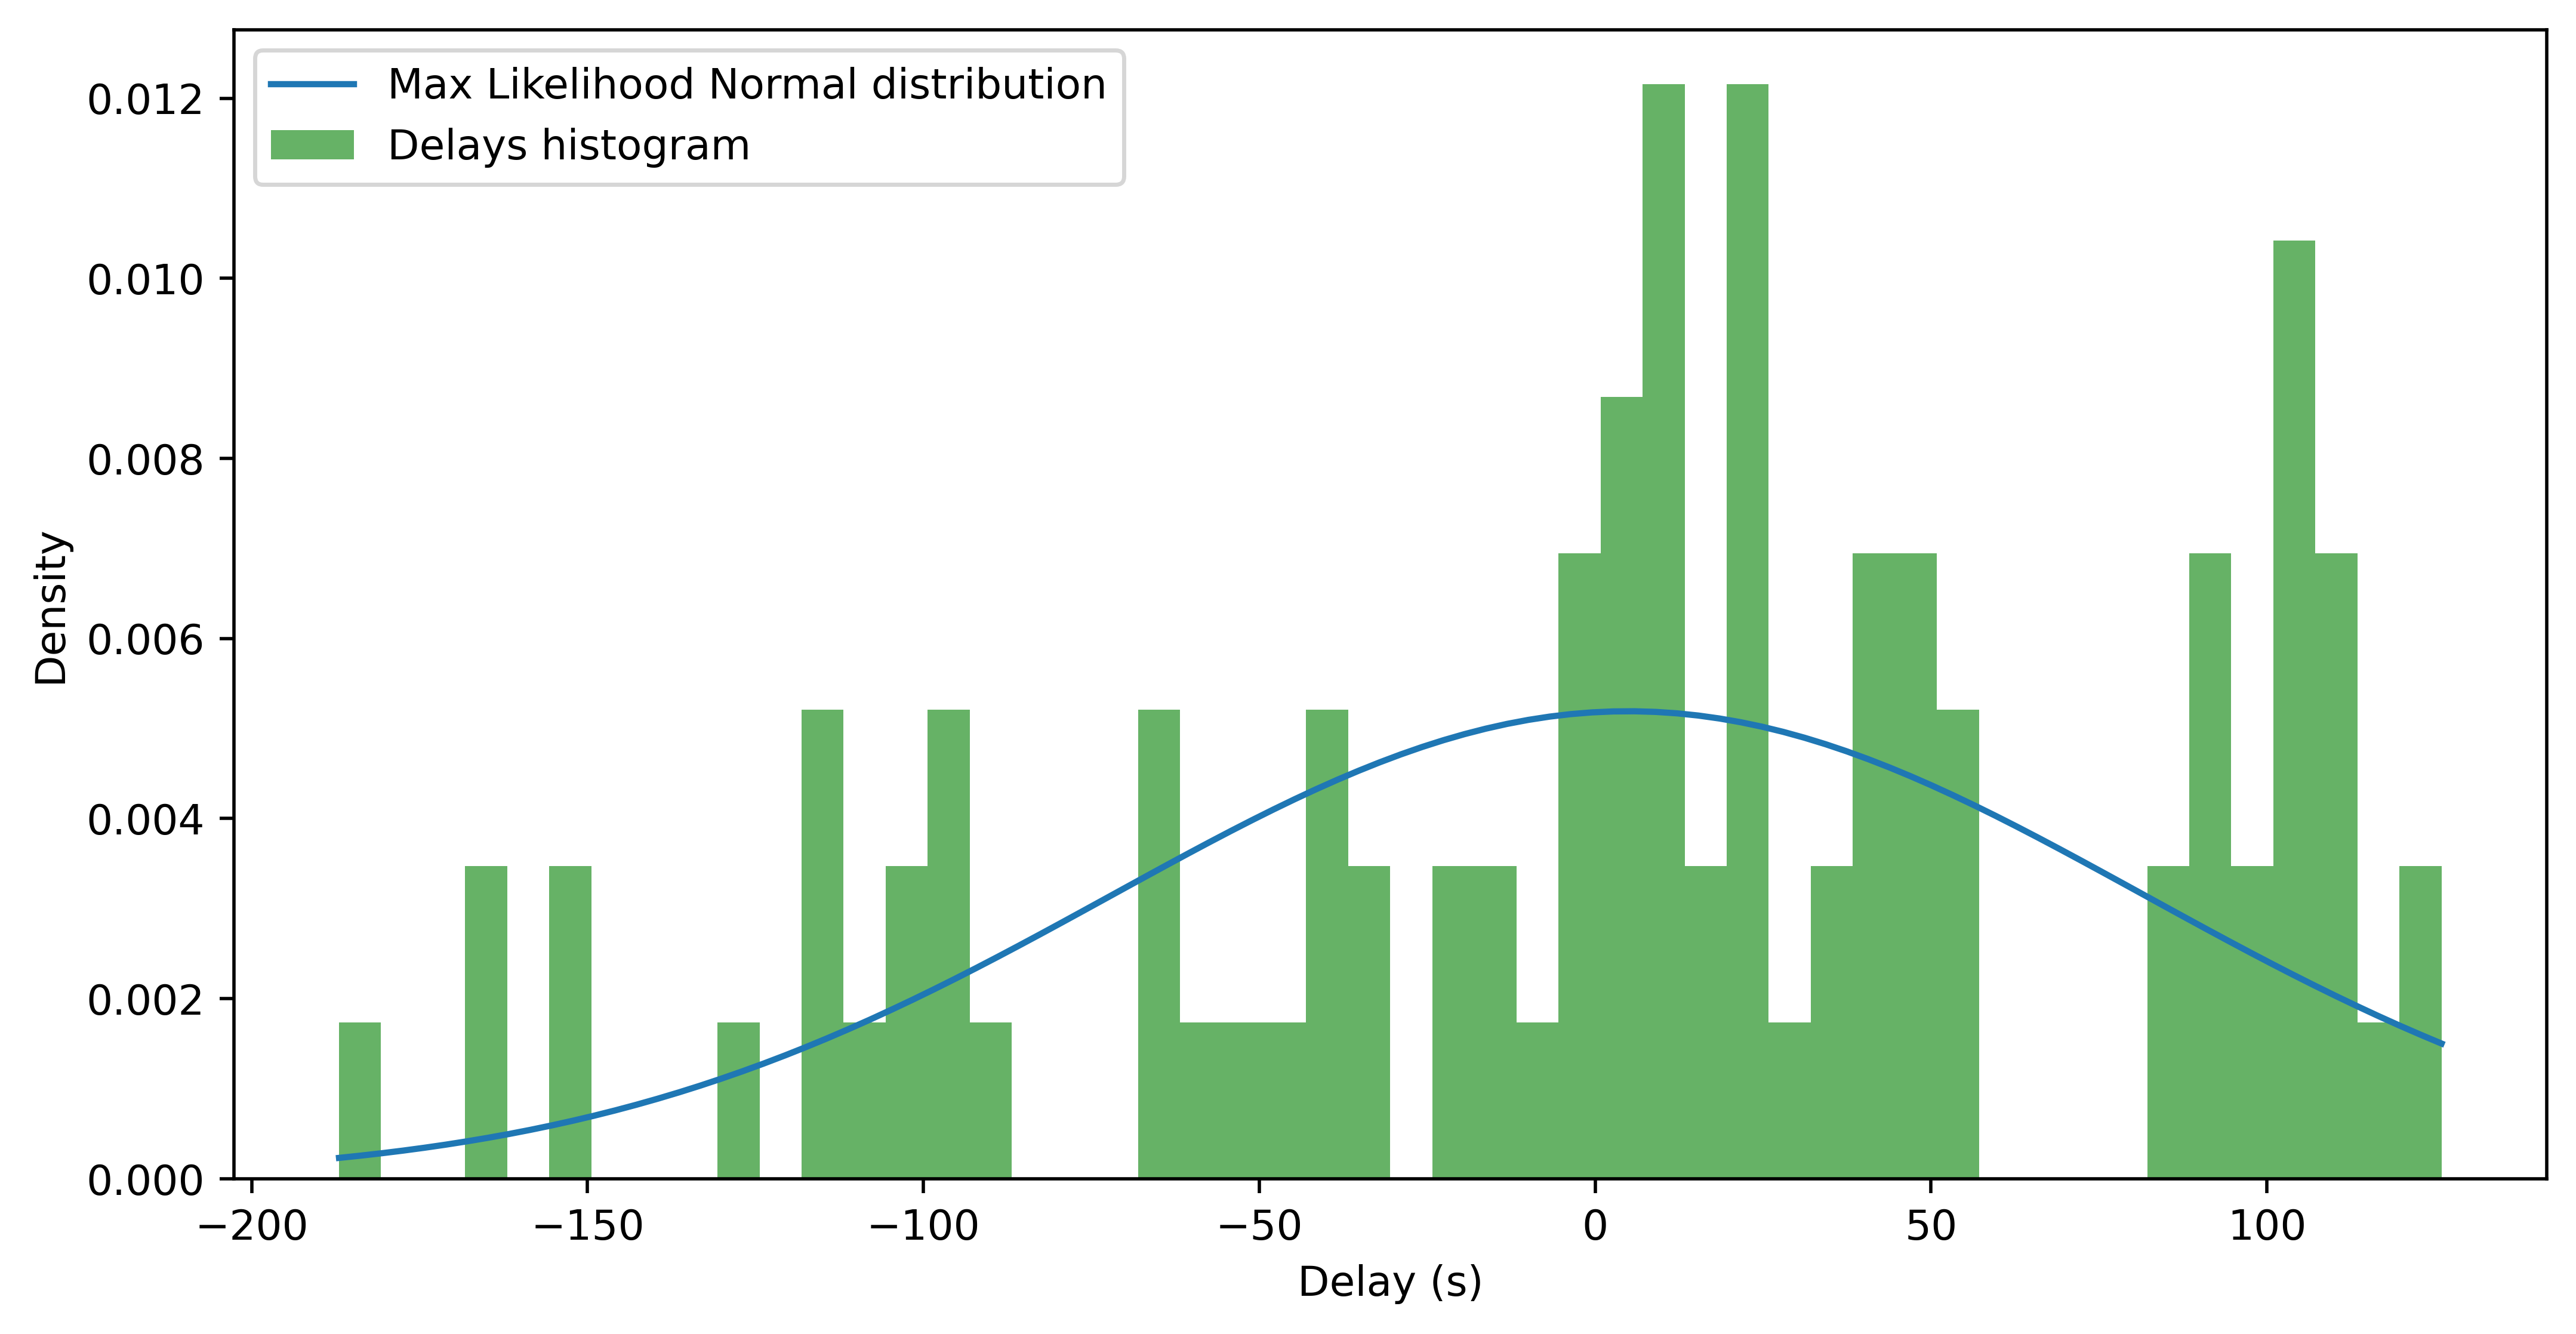

In [23]:
th = TimetablesHandler()
plt.figure(figsize=(10, 5), dpi=500)
th.plot_delays('Holland Park', 'EB', 'FRI', interval = ((-8, 0), (8, 0)), n_bins=50, plot='Normal')

In [24]:
print(len(th.actual_timetable[(th.actual_timetable['stationName'] == 'Holland Park Underground Station')
                              & (th.actual_timetable['direction'] == 'inbound')]))

820
